<h1 style = 'text-align: center;'>Accident Analysis of Kingston Upon Hull Region<h1>
<h5 style = 'text-align: right;'>-by Shaon Biswas<h5>

## Objective: 

1. To find out the significant hours of the day, and days of the week, accidents occur.
2. To check if the motorbikes (Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc)accident occurs in a significant hours of the day, and days of the week.
3. To assess in case of pedestrians involved in accident, if there is any significant hours of the day, and days of the week, accidents occur.
4. To explore the impact of selected variables like speed_limit, Weather, Road Surface Condition, Light conditions, special conditions at site, Skidding and overturning of the vehicle have impact on Accident severity. 
5. Identify the accidental clusters in the Kingston Upon Hull region.
6. Idifying the unusual entries in the dataset using the outlier detection nethods
7. Developing some classification models that can accurately preditc fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures

## Connecting the database for this analysis

In [1]:
#importing necessary library
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import sklearn
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the absolute path
db_path = os.path.abspath("/Users/shaonbiswas/PycharmProjects/accident_analysis/Database/accident_data_v1.0.0_2023.db")

# Test connection
try:
    conn = sqlite3.connect(db_path)
    print("Database connected successfully!")
except sqlite3.Error as e:
    print(f"Error: {e}")

Database connected successfully!


In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

## Auditing the dataset

In [5]:
# to know the table names of the database
for table in tables:
    print(table[0])

accident
casualty
vehicle
lsoa


So this dataset has 4 tables. Now its time to understand what these datasets are all about.

In [6]:
# To find length of each table we use COUNT function
table_lengths = {}
tables = ['accident', 'vehicle', 'casualty', 'lsoa']

for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    length = cursor.fetchone()[0]
    table_lengths[table] = length

# printing the length of each table
for table, length in table_lengths.items():
    print(f"Length of {table} table: {length}")

Length of accident table: 461352
Length of vehicle table: 849091
Length of casualty table: 600332
Length of lsoa table: 34378


## Accident Table to Panda DataFrame

In [7]:
# to create a Pandas DataFrame from the "accident" table
query = "SELECT * FROM accident"
accident_df = pd.read_sql_query(query, conn)

In [8]:
accident_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [9]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [10]:
accident_df.isnull().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

#### Note: 

Only 4 column has missing data, where 116-126 row have missing value out of 461352 row. It is ideal to drop the row of these small portion of data, however, since I want to keep most of the data I like to use the mode of the colume to replace the missing data. Mode is the most frequently used data in a dataset.

In [11]:
# Using mode to replace missing values in 'location_easting_osgr' column
mode_easting_osgr = accident_df['location_easting_osgr'].mode()[0]
accident_df['location_easting_osgr'].fillna(mode_easting_osgr, inplace=True)

# Using mode to replace missing values in 'location_northing_osgr' column
mode_northing_osgr = accident_df['location_northing_osgr'].mode()[0]
accident_df['location_northing_osgr'].fillna(mode_northing_osgr, inplace=True)

# Using mode to replace missing values in 'longitude' column
mode_longitude = accident_df['longitude'].mode()[0]
accident_df['longitude'].fillna(mode_longitude, inplace=True)

# Using mode to replace missing values in 'latitude' column
mode_latitude = accident_df['latitude'].mode()[0]
accident_df['latitude'].fillna(mode_latitude, inplace=True)

In [12]:
accident_df.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [13]:
accident_df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461352.000000,4.613520e+05,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,...,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452613.496287,2.801554e+05,-1.246680,52.408610,28.193388,2.784436,1.840441,1.301245,4.108171,...,0.262112,1.099518,2.036235,1.649918,1.385239,0.217519,0.170518,1.325463,1.334877,1.680147
std,1.091566,94819.506482,1.515392e+05,1.389645,1.364991,24.801609,0.443648,0.709869,0.746398,1.927216,...,1.460680,2.333113,1.724691,1.819426,0.955180,1.240981,1.121964,0.469057,0.556352,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388555.750000,1.755390e+05,-2.172356,51.465773,5.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459218.500000,2.207910e+05,-1.125910,51.869712,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529310.000000,3.865310e+05,-0.136191,53.372775,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


## Fixing Negative Value in Categorical Data

The accident table describe function showing that some categorical column has negetive values, some of which we need to adjust using various logics. I want to adjust only those data points which can be useful for this analysis.

In [14]:
description = accident_df.describe()

# Find columns with negative minimum values
columns_with_negative_min = description.columns[description.loc['min'] < 0]

print(columns_with_negative_min)

Index(['longitude', 'local_authority_district', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')


<b> Note: </b> For this analysis I think 'longitude', 'local_authority_district', 'speed_limit',        'junction_detail', 'light_conditions','weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', & 'did_police_officer_attend_scene_of_accident' are important. Therefore I want to clean these column before starting the analysis

### Logics

<b>1. Longitute </b> - In UK map I have check geographic data, and found there are several negetive longitude. (FreeMapTools, 2021). So this negetive data need not to be fixed.

<b>2. local_authority_district </b> - In the Stats 20 pdf document, we do not have any rule for local authority district. However, we have local authority code number in Annex 7. After auditing the dataset I recognise most for same lsoa_of_accident_location have the common local_authority_district, thus the negative value can be replaced with the mode of common lsoa_of_accident_location of the related group.

<b> 3. Speed_limit </b>- The Stats 20 pdf file showing speed limit should be permanent. Therefore the negetive value can be replaced with the mode of remaining data.

<b> 4. junction_detail </b>- Stats20 showing junction details can be marked as other junction (9), I will dicide this after auditing the data, whether I want to convert -1 to 9 or mode of other numbers.

<b> 5. light_conditions </b> - in the Stats20 data there is not guidance for others or unknown conditions, with only 5 valid datapoint 1,4,5,6,7. Therefore I want to mitigate the negative value with the mode of these data points.

<b> 6. Weather_conditions </b> - The Stats20 file showing the 9 valid datapoint from 1 to 9, where 9 is unknown, therefore we can define negative weather condition as unknown, which means 9.

<b> 7. Road_surface_conditions </b> - Stats20 file showing that only 1,2,3,4,5 are the valid data, all other data points are invalid. Therefore I want to replace -1 and 9 with the median point as the data is squwed towards 1.

<b> 8. Surface_Conditions </b> - The State20 file showing the only data valid points are 0,1,2,3,4,5,6,7. Therefore I want to convert all other data with the mode value.

<b> 9. Police Attendence </b> - Stats20 file showing only 2 valid data points 1 & 2, therefore all other points should be replaced with the mode.

<b> 10. Pedestrian_crossing_human_control </b> - Stats20 file showing only 6 valid points 0,1,4,5,7 and 8 for this column, Therefore I want to nullify -1 and other invalid datapoint with mode of positive values.

<b> 11. Carriageway_hazards </b> - Stats20 file showing 6 valid datapoints for this section as 0,1,2,3,6 and 7. Therefore I want to nullify -1 and other invalid datapoint with mode of positive values.
    




### Local Authority District Data Cleaning

In [15]:
accident_df['local_authority_district'].unique()

array([ 32,   1,   5,   4,  24,  26,  30,   9,  31,  27,   8,   2,  15,
        10,  11,  57,  14,  16,   6,  22,  13,  19,  21,  28,   3,  20,
        18,  25,  17,  23,  12,  29,   7, 570,  65,  60,  64,  61,  62,
        63,  75,  70,  80,  73,  72,  82,  77,  79,  83,  84,  74,  71,
        85,  76,  95,  91,  93,  90,  92, 114, 109, 112, 102, 107, 110,
       100, 101, 106, 104, 129, 128, 130, 124, 148, 147, 146, 149, 139,
       150, 161, 169, 186, 184, 187, 182, 181, 180, 185, 189, 200, 206,
       204, 203, 202, 211, 213, 215, 210, 228, 231, 233, 232, 240, 241,
       243, 245, 300, 307, 306, 305, 309, 303, 302, 254, 255, 251, 257,
       252, 258, 253, 256, 250, 286, 278, 274, 273, 277, 270, 285, 276,
       284, 290, 293, 292, 294, 291, 320, 322, 323, 321, 324, 325, 329,
       327, 328, 344, 340, 341, 345, 346, 347, 343, 342, 352, 355, 351,
       356, 353, 350, 354, 363, 364, 361, 367, 362, 366, 365, 360, 368,
       380, 382, 383, 381, 386, 385, 384, 395, 392, 393, 390, 39

<Axes: xlabel='local_authority_district', ylabel='Count'>

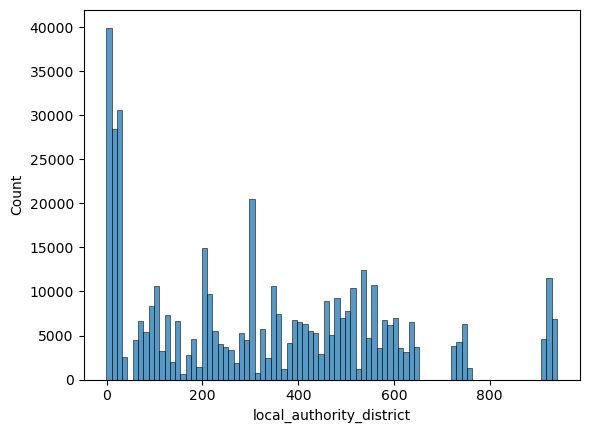

In [16]:
sns.histplot(data = accident_df['local_authority_district'])

In [17]:
# Generate value counts for 'local_authority_district' column
value_counts = accident_df['local_authority_district'].value_counts()

# Iterate through the value counts series and print each value-count pair
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")


Value: 300, Count: 9762
Value: 1, Count: 5746
Value: 204, Count: 5707
Value: 9, Count: 4874
Value: 596, Count: 4320
Value: 5, Count: 4281
Value: 8, Count: 4234
Value: 10, Count: 3862
Value: 30, Count: 3833
Value: 27, Count: 3794
Value: 215, Count: 3761
Value: 20, Count: 3673
Value: 32, Count: 3631
Value: 28, Count: 3571
Value: 200, Count: 3533
Value: 102, Count: 3504
Value: 91, Count: 3458
Value: 4, Count: 3452
Value: 635, Count: 3437
Value: 31, Count: 3432
Value: 2, Count: 3413
Value: 601, Count: 3408
Value: 926, Count: 3399
Value: 17, Count: 3307
Value: 7, Count: 3303
Value: 346, Count: 3154
Value: 25, Count: 3004
Value: 228, Count: 2992
Value: 3, Count: 2937
Value: 14, Count: 2846
Value: 6, Count: 2840
Value: 923, Count: 2839
Value: 19, Count: 2823
Value: 169, Count: 2776
Value: 26, Count: 2719
Value: 129, Count: 2657
Value: 11, Count: 2643
Value: 12, Count: 2630
Value: 13, Count: 2629
Value: 565, Count: 2603
Value: 231, Count: 2567
Value: 211, Count: 2459
Value: 203, Count: 2427
Va

- -1 is present 991 times in this column

In [18]:
# mode of the 'lsoa_of_accident_location' column
mode_lsoa = accident_df['lsoa_of_accident_location'].mode()[0]

# Identify the mode of 'local_authority_district' for the common values in 'lsoa_of_accident_location'
mode_local_authority = accident_df['local_authority_district'][accident_df['lsoa_of_accident_location'] == mode_lsoa].mode()[0]

# Replace negative values in 'local_authority_district' with the calculated mode
accident_df['local_authority_district'] = accident_df['local_authority_district'].apply(lambda x: mode_local_authority if x < 0 else x)

In [19]:
accident_df['local_authority_district'].unique()

array([ 32,   1,   5,   4,  24,  26,  30,   9,  31,  27,   8,   2,  15,
        10,  11,  57,  14,  16,   6,  22,  13,  19,  21,  28,   3,  20,
        18,  25,  17,  23,  12,  29,   7, 570,  65,  60,  64,  61,  62,
        63,  75,  70,  80,  73,  72,  82,  77,  79,  83,  84,  74,  71,
        85,  76,  95,  91,  93,  90,  92, 114, 109, 112, 102, 107, 110,
       100, 101, 106, 104, 129, 128, 130, 124, 148, 147, 146, 149, 139,
       150, 161, 169, 186, 184, 187, 182, 181, 180, 185, 189, 200, 206,
       204, 203, 202, 211, 213, 215, 210, 228, 231, 233, 232, 240, 241,
       243, 245, 300, 307, 306, 305, 309, 303, 302, 254, 255, 251, 257,
       252, 258, 253, 256, 250, 286, 278, 274, 273, 277, 270, 285, 276,
       284, 290, 293, 292, 294, 291, 320, 322, 323, 321, 324, 325, 329,
       327, 328, 344, 340, 341, 345, 346, 347, 343, 342, 352, 355, 351,
       356, 353, 350, 354, 363, 364, 361, 367, 362, 366, 365, 360, 368,
       380, 382, 383, 381, 386, 385, 384, 395, 392, 393, 390, 39

<Axes: xlabel='local_authority_district', ylabel='Count'>

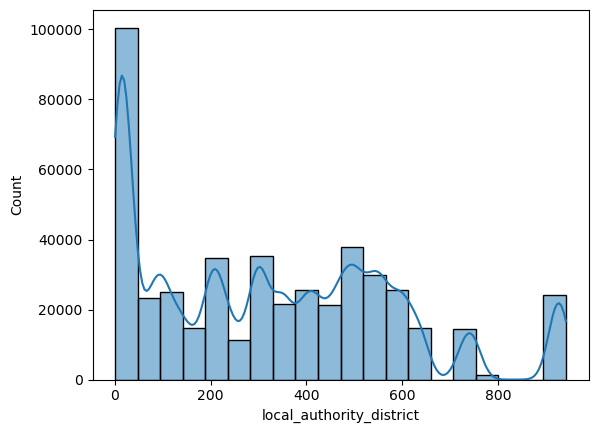

In [20]:
sns.histplot(data = accident_df['local_authority_district'], kde = True, bins = 20)

### Speed_limit Data Correction

In [21]:
# Calculate the mode of the 'speed_limit' column
mode_speed_limit = accident_df[accident_df['speed_limit'] >= 0]['speed_limit'].mode()[0]

# Replace negative values in 'speed_limit' with the calculated mode
accident_df['speed_limit'] = accident_df['speed_limit'].apply(lambda x: mode_speed_limit if x < 0 else x)


In [22]:
accident_df['speed_limit'].unique()

array([30, 20, 40, 50, 60, 70], dtype=int64)

<Axes: xlabel='speed_limit', ylabel='Count'>

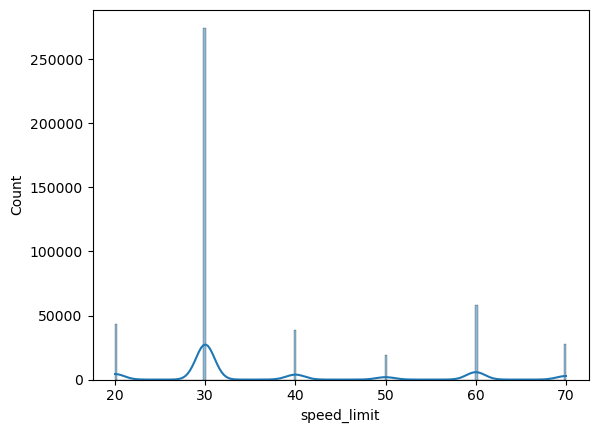

In [23]:
sns.histplot(data = accident_df['speed_limit'], kde = True)

### Junction Details Data Correction

In [24]:
accident_df['junction_detail'].unique()

array([ 0,  3,  1,  6,  2,  9,  7,  5,  8, 99, -1], dtype=int64)

In [25]:
#99 and -1 is not valid accoding to stats20 documents
# 99 probably a typo of 9, so i want to replace it with 9
# to replace -1, I want to use mode

# Step 1: Calculate the mode of the 'junction_detail' column
mode_junction_detail = accident_df[accident_df['junction_detail'] >= 0]['junction_detail'].mode()[0]

# Step 2: Replace the value 99 with 9 and -1 with the mode
replace_dict = {99: 9, -1: mode_junction_detail}
accident_df['junction_detail'] = accident_df['junction_detail'].replace(replace_dict)


In [26]:
accident_df['junction_detail'].unique()

array([0, 3, 1, 6, 2, 9, 7, 5, 8], dtype=int64)

<Axes: xlabel='junction_detail', ylabel='Count'>

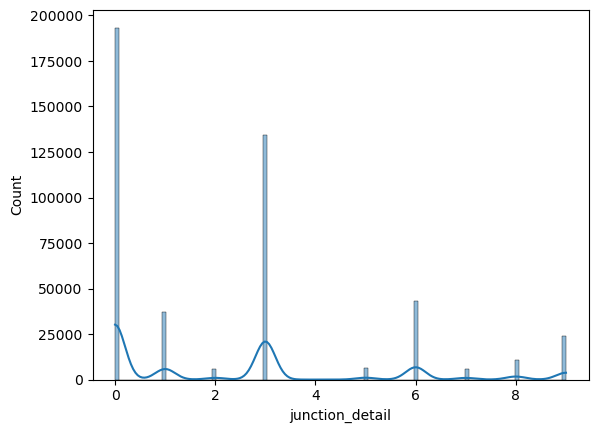

In [27]:
sns.histplot(data = accident_df['junction_detail'],kde = True)

### Light Conditions Data Cleaning

In [28]:
accident_df['light_conditions'].unique()

array([ 4,  6,  1,  7,  5, -1], dtype=int64)

In [29]:
mode_of_light_conditions = accident_df[accident_df['light_conditions'] >= 0]['light_conditions'].mode()[0]

accident_df['light_conditions'] = accident_df['light_conditions'].apply(lambda x: mode_of_light_conditions if x < 0 else x)



In [30]:
accident_df['light_conditions'].unique()

array([4, 6, 1, 7, 5], dtype=int64)

<Axes: ylabel='Count'>

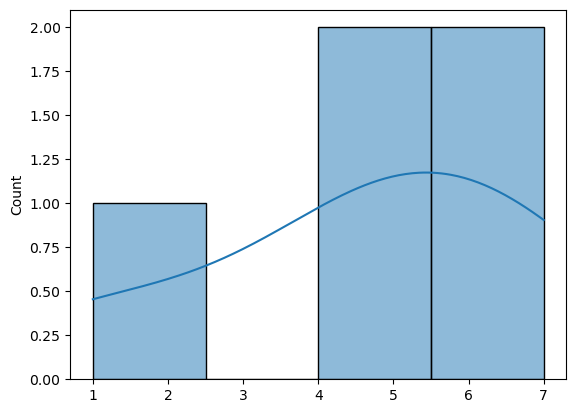

In [31]:
sns.histplot(accident_df['light_conditions'].unique(), kde = True)

### Weather Conditions Data Cleaning

In [32]:
accident_df['weather_conditions'].unique()

array([ 1,  2,  9,  8,  7,  3,  5,  4,  6, -1], dtype=int64)

In [33]:
accident_df['weather_conditions'] = accident_df['weather_conditions'].apply(lambda x: 9 if x < 0 else x)


In [34]:
accident_df['weather_conditions'].unique()

array([1, 2, 9, 8, 7, 3, 5, 4, 6], dtype=int64)

<Axes: xlabel='weather_conditions', ylabel='Count'>

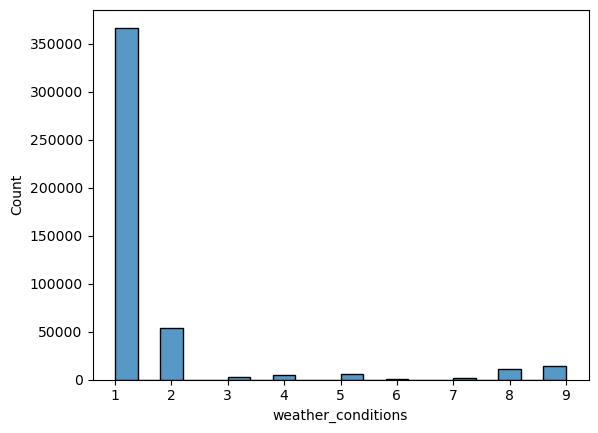

In [35]:
sns.histplot(data = accident_df['weather_conditions'])

### Road Surface Condition Data Cleaning

In [36]:
accident_df['road_surface_conditions'].unique()

array([ 1,  2,  9,  4,  3,  5, -1], dtype=int64)

<Axes: xlabel='road_surface_conditions', ylabel='Count'>

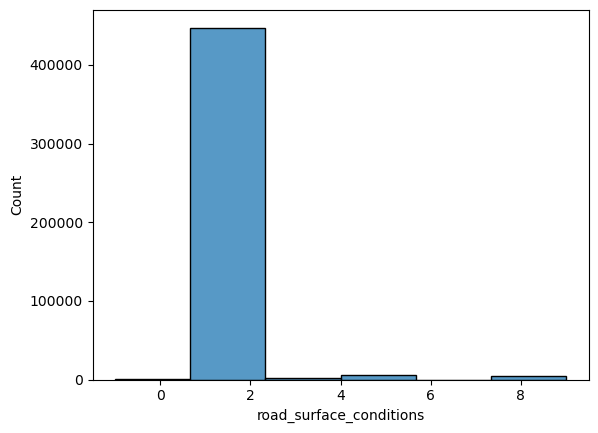

In [37]:
sns.histplot(data = accident_df['road_surface_conditions'], bins = 6)

Stats20 file showing that only 1,2,3,4,5 are the valid data, all other data points are invalid. Therefore I want to replace -1 and 9 with the median point as the data is squwed towards 1.

In [38]:
median_road_surface_conditions = accident_df[accident_df['road_surface_conditions'] >= 0]['road_surface_conditions'].median()

accident_df['road_surface_conditions'] = accident_df['road_surface_conditions'].apply(lambda x: median_road_surface_conditions if x < 0 or x == 9 else x)

In [39]:
accident_df['road_surface_conditions'].unique()

array([1., 2., 4., 3., 5.])

<Axes: xlabel='road_surface_conditions', ylabel='Count'>

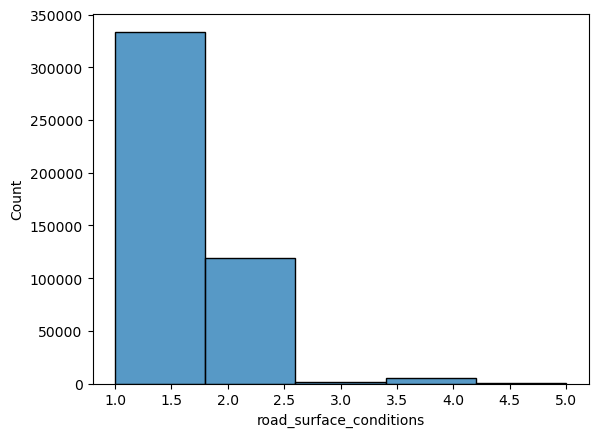

In [40]:
sns.histplot(data = accident_df['road_surface_conditions'], bins = 5)

### Special_Conditions_at_Site Data Cleaning

The State20 file showing the only data valid points are 0,1,2,3,4,5,6,7. Therefore I want to convert all other data with the mode value.

In [41]:
accident_df['special_conditions_at_site'].unique()

array([ 0,  4,  9,  2,  3,  1,  7,  5,  6, -1], dtype=int64)

In [42]:
mode_special_conditions_at_site = accident_df[accident_df['special_conditions_at_site'] >= 0]['special_conditions_at_site'].mode()[0]

accident_df['special_conditions_at_site'] = accident_df['special_conditions_at_site'].apply(lambda x: mode_special_conditions_at_site if x<0 or x == 9 else x)


In [43]:
accident_df['special_conditions_at_site'].unique()

array([0, 4, 2, 3, 1, 7, 5, 6], dtype=int64)

<Axes: xlabel='special_conditions_at_site', ylabel='Count'>

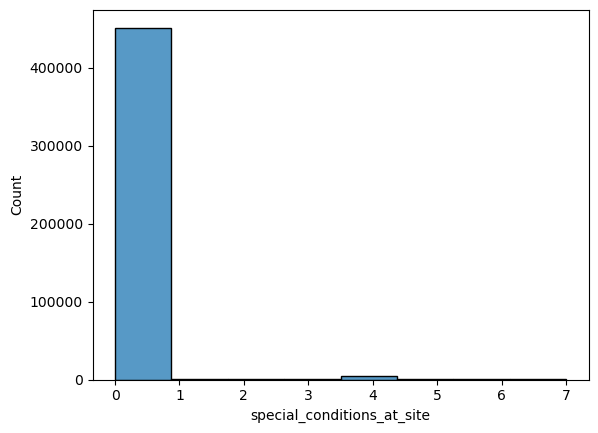

In [44]:
sns.histplot(data = accident_df['special_conditions_at_site'], bins = 8)

### Police Attendence Data Cleaning

Stats20 file showing only 2 valid data points 1 & 2, therefore all other points should be replaced with the mode.

In [45]:
accident_df['did_police_officer_attend_scene_of_accident'].unique()


array([ 1,  2,  3, -1], dtype=int64)

In [46]:
mode_police_attendence = accident_df[accident_df['did_police_officer_attend_scene_of_accident'] >= 0]['did_police_officer_attend_scene_of_accident'].mode()[0]

accident_df['did_police_officer_attend_scene_of_accident'] = accident_df['did_police_officer_attend_scene_of_accident'].apply(lambda x: mode_police_attendence if x != 1 and x != 2 else x)


<Axes: xlabel='did_police_officer_attend_scene_of_accident', ylabel='Count'>

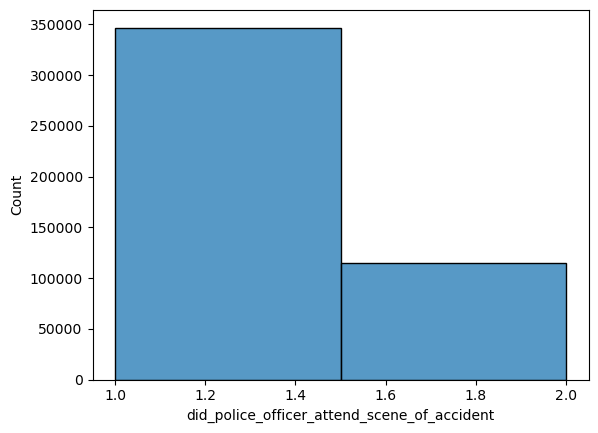

In [47]:
sns.histplot(data = accident_df['did_police_officer_attend_scene_of_accident'], bins = 2)

### Pedestrain Crossing Physical Facilities data cleaning

In [48]:
accident_df['pedestrian_crossing_physical_facilities'].unique() #0,1,4,5,7,8 are the valid data point

array([ 0,  4,  5,  9,  1,  8,  7, -1], dtype=int64)

In [49]:
mode_ped = accident_df[accident_df['pedestrian_crossing_physical_facilities'] >= 0]['pedestrian_crossing_physical_facilities'].mode()[0]

accident_df['pedestrian_crossing_physical_facilities'] = accident_df['pedestrian_crossing_physical_facilities'].apply(lambda x: mode_ped if x<0 or x == 9 else x)

<Axes: xlabel='pedestrian_crossing_physical_facilities', ylabel='Count'>

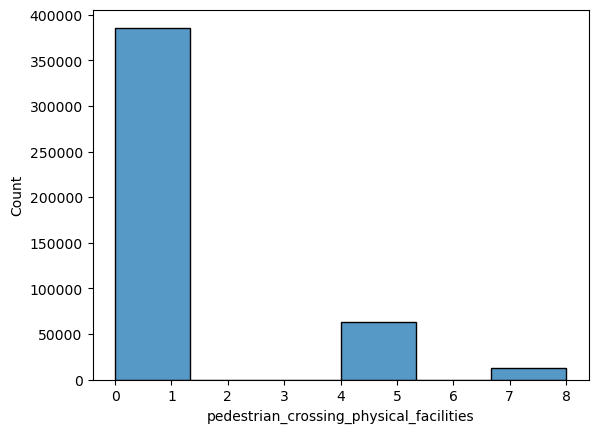

In [50]:
sns.histplot(data = accident_df['pedestrian_crossing_physical_facilities'], bins = 6)

## Curriageway Hazards Data Cleaning

In [51]:
accident_df['carriageway_hazards'].unique() #0,1,2,3,6,7 are the valid data point

array([ 0,  9,  2,  6,  3,  1,  7, -1], dtype=int64)

In [52]:
mode_haz = accident_df[accident_df['carriageway_hazards'] >= 0]['carriageway_hazards'].mode()[0]

accident_df['carriageway_hazards'] = accident_df['carriageway_hazards'].apply(lambda x: mode_ped if x<0 or x == 9 else x)

<Axes: xlabel='carriageway_hazards', ylabel='Count'>

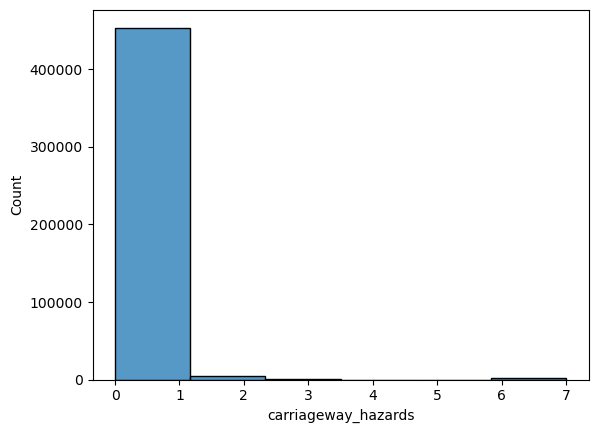

In [53]:
sns.histplot(data = accident_df['carriageway_hazards'], bins = 6)

In [54]:
accident_df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461352.000000,4.613520e+05,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,...,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452613.496287,2.801554e+05,-1.246680,52.408610,28.193388,2.784436,1.840441,1.301245,4.108171,...,0.262112,0.878329,2.036248,1.650373,1.309059,0.092147,0.060544,1.325463,1.248136,1.680147
std,1.091566,94819.506482,1.515392e+05,1.389645,1.364991,24.801609,0.443648,0.709869,0.746398,1.927216,...,1.460680,1.969459,1.724675,1.820014,0.558093,0.659580,0.529606,0.469057,0.431932,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000
25%,2017.000000,388555.750000,1.755390e+05,-2.172356,51.465773,5.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459218.500000,2.207910e+05,-1.125910,51.869712,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529310.000000,3.865310e+05,-0.136191,53.372775,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,...,9.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,2.000000,2.000000


## LSOA_of_accident_location Data Cleaning

In [55]:
# Auditing the data
accident_df['lsoa_of_accident_location'].value_counts()

-1           23141
E01032739      629
E01004736      474
E01033595      324
E01002444      274
             ...  
E01013053        1
E01003457        1
E01012797        1
W01000356        1
W01000636        1
Name: lsoa_of_accident_location, Length: 33748, dtype: int64

This data as total 23141 data of -1, therefore we can not use median and mode to replace the -1, also we can not use mean value is these are not numerical data. Therefore to eleminate -1 and get the valid LSOA data I like to run several classification model using already cleaned feathers like location_easting_osgr, location_northing_osgr, longitude, latitude,local_authority_district. Here lsoa_of_accident_location is the target variable. For this operation I want to use k-nearest neighbour classification model. I have also tried to test random forest, decision tree but error message appeard as not enough memory.

In [56]:
# Drop rows where "lsoa_of_accident_location" is equal to "-1".
cleaned_accident_df = accident_df[accident_df['lsoa_of_accident_location'] != '-1']
features = ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'local_authority_district']
target = 'lsoa_of_accident_location'
X = cleaned_accident_df[features]
y = cleaned_accident_df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Select relevant features and target variable
features = ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'local_authority_district']
target = 'lsoa_of_accident_location'

X = cleaned_accident_df[features]
y = cleaned_accident_df[target]

In [58]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Hyper paramiter tuning to improve model accuracy

param_grid = {'n_neighbors': range(1, 11)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [60]:
#Training the KNN model with oplimal K
knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
omitted_rows = accident_df[accident_df['lsoa_of_accident_location'] == '-1']
X_omitted = omitted_rows[features]
X_omitted_scaled = scaler.transform(X_omitted)
omitted_predictions = knn_model.predict(X_omitted_scaled)
accident_df.loc[omitted_rows.index, 'lsoa_of_accident_location'] = omitted_predictions

In [62]:
accident_df['lsoa_of_accident_location'].unique()

array(['E01001450', 'E01004702', 'E01004298', ..., 'W01000964',
       'W01001793', 'W01000636'], dtype=object)

In [63]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1.0,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2.0,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1.0,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2.0,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2.0,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1.0,0,0,1,1,-1,E01020590
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1.0,0,0,1,2,-1,E01020590
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1.0,0,0,2,1,-1,E01020590
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1.0,0,0,1,2,-1,E01020590


In [64]:
accident_df_2020 = accident_df[accident_df['accident_year'] == 2020]

In [65]:
accident_df_2020

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
370153,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,0,1,9,1.0,0,0,1,1,2,E01004576
370154,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1.0,0,0,1,1,2,E01003034
370155,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2.0,0,0,1,1,2,E01004726
370156,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1.0,0,0,1,1,2,E01003617
370157,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1.0,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1.0,0,0,1,1,-1,E01020590
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1.0,0,0,1,2,-1,E01020590
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1.0,0,0,2,1,-1,E01020590
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1.0,0,0,1,2,-1,E01020590


In [66]:
accident_df_2020.shape

(91199, 36)

## Casualty Table to Panda Dataframe

In [67]:
# Create a Pandas DataFrame from the "casualty" table
query = "SELECT * FROM casualty"
casualty_df = pd.read_sql_query(query, conn)

In [68]:
casualty_df.head()

In [69]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600332 entries, 0 to 600331
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      600332 non-null  int64 
 1   accident_index                      600332 non-null  object
 2   accident_year                       600332 non-null  int64 
 3   accident_reference                  600332 non-null  object
 4   vehicle_reference                   600332 non-null  int64 
 5   casualty_reference                  600332 non-null  int64 
 6   casualty_class                      600332 non-null  int64 
 7   sex_of_casualty                     600332 non-null  int64 
 8   age_of_casualty                     600332 non-null  int64 
 9   age_band_of_casualty                600332 non-null  int64 
 10  casualty_severity                   600332 non-null  int64 
 11  pedestrian_location                 600

In [70]:
casualty_df.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [71]:
casualty_df.describe()

,casualty_index,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000
mean,300165.500000,2018.355358,1.473603,1.386776,1.485818,1.392463,36.759541,6.316057,2.818529,0.745468,0.591428,0.251229,0.066735,0.055752,7.256840,1.000961,4.198818
std,173301.065238,1.088030,1.923189,2.734247,0.724916,0.505589,19.432658,2.421155,0.413712,2.109848,1.915041,0.639142,0.494824,0.330575,8.531054,0.980724,3.290187
min,0.000000,2017.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,150082.750000,2017.000000,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,300165.500000,2018.000000,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,450248.250000,2019.000000,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,600331.000000,2020.000000,999.000000,992.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,3.000000,99.000000,3.000000,10.000000


The data description showing that we may have some negetive value in the data set like the accident table. So we need to clean the data

In [72]:
description = casualty_df.describe()

# Find columns with negative minimum values
columns_with_negative_min = description.columns[description.loc['min'] < 0]

print(columns_with_negative_min)

Index(['sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


<b> Note: </b> To answer the questions of this assignment, I need cleaned data in 'sex_of_casualty', 'age_of_casualty' column. So these two column's data cleaning was performed

### Sex of Casualty data cleaning

In [73]:
casualty_df['sex_of_casualty'].unique()

array([ 2,  1, -1,  9], dtype=int64)

In [74]:
casualty_df['sex_of_casualty'].value_counts()

 1    360231
 2    238540
-1      1542
 9        19
Name: sex_of_casualty, dtype: int64

Since only small portion of data is invalid other than 1 or 2 whichi is Male or Female, I think its ideal to use mode to replace  the invalid values

In [75]:
mode_sex_of_casualty = casualty_df[casualty_df['sex_of_casualty'] >= 0]['sex_of_casualty'].mode()[0]

casualty_df['sex_of_casualty'] = casualty_df['sex_of_casualty'].apply(lambda x: mode_sex_of_casualty if x != 1 and x != 2 else x)


In [76]:
casualty_df['sex_of_casualty'].value_counts()

1    361792
2    238540
Name: sex_of_casualty, dtype: int64

### Age of Casualty Data Cleaning

In [77]:
casualty_df['age_of_casualty'].unique()

array([ 18,  19,  33,  31,   3,  45,  14,  58,  27,  39,  48,  26,  47,
        11,  15,  23,  60,  34,  44,  25,  50,  53,  13,  22,  24,  20,
        37,  49,  59,  30,  17,  29,  69,  28,  16,  32,  41,   6,  36,
         4,   7,   5,   8,  21,   9,  76,  73,  43,  54,  52,  74,  84,
        65,  40,  88,  51,  63,  35,  55,  42,  61,  66,  86,  67,  46,
        10,  72,  38,  12,  57,  56,   2,  90,  77,  71,  85,  91,  70,
        62,  87,  80,  83,   0,  64,  89,  79,  82,  68,  -1,  94,   1,
        78,  81,  93,  75,  92,  97,  96,  95,  98, 100,  99, 101, 102],
      dtype=int64)

<Axes: xlabel='age_of_casualty', ylabel='Count'>

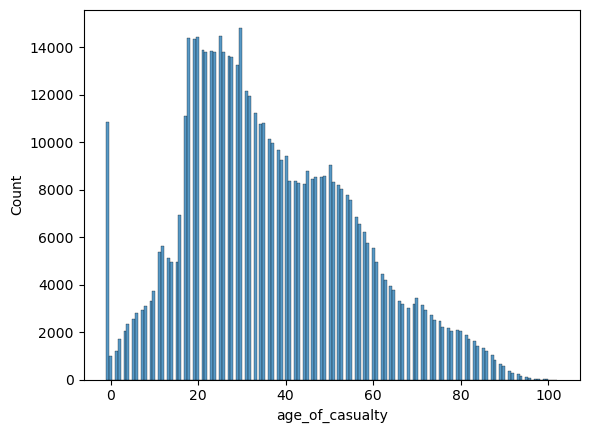

In [78]:
sns.histplot(data = casualty_df['age_of_casualty'] )

In [79]:
skewness_age_of_casualty = casualty_df['age_of_casualty'].skew()

skewness_age_of_casualty

0.4626392086090678

The histogram showing the data is bit skewed to left, therefore I want to use the numerical mean to replace -1 from the dataset

In [80]:
mean_age_of_casualty = casualty_df[casualty_df['age_of_casualty'] >= 0]['age_of_casualty'].mean()

casualty_df['age_of_casualty'] = casualty_df['age_of_casualty'].apply(lambda x: mean_age_of_casualty if x<0 else x )

<Axes: xlabel='age_of_casualty', ylabel='Count'>

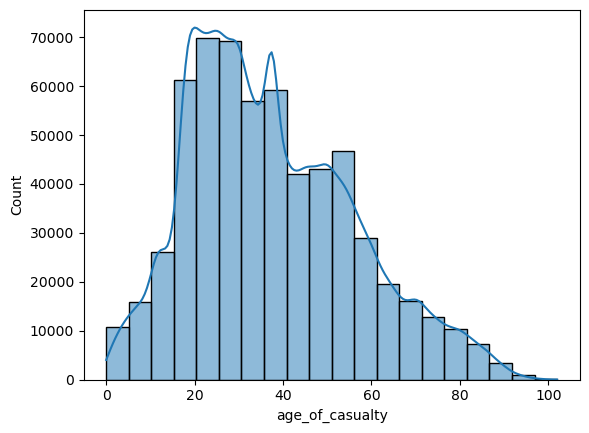

In [81]:
sns.histplot(data = casualty_df['age_of_casualty'],kde = True, bins = 20 )

## Vehicle table to Panda Dataframe

In [82]:
query = "SELECT * FROM vehicle"
vehicle_df = pd.read_sql_query(query, conn)

In [83]:
vehicle_df.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [84]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849091 entries, 0 to 849090
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     849091 non-null  int64 
 1   accident_index                    849091 non-null  object
 2   accident_year                     849091 non-null  int64 
 3   accident_reference                849091 non-null  object
 4   vehicle_reference                 849091 non-null  int64 
 5   vehicle_type                      849091 non-null  int64 
 6   towing_and_articulation           849091 non-null  int64 
 7   vehicle_manoeuvre                 849091 non-null  int64 
 8   vehicle_direction_from            849091 non-null  int64 
 9   vehicle_direction_to              849091 non-null  int64 
 10  vehicle_location_restricted_lane  849091 non-null  int64 
 11  junction_location                 849091 non-null  int64 
 12  sk

In [85]:
vehicle_df.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [86]:
vehicle_df.describe()

,vehicle_index,accident_year,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,...,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,...,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000
mean,424545.000000,2018.367693,1.560201,9.919154,0.186483,16.745490,4.300950,4.339601,4.616092,2.482244,...,1.336589,4.679909,1.465472,35.230026,5.893647,1408.005845,0.992076,5.749201,3.793211,0.811947
std,245111.603045,1.090652,1.705475,10.731438,1.221928,19.089002,2.629313,2.619161,20.465322,3.194240,...,1.603511,1.965837,0.669050,20.716743,3.132842,1605.009043,1.493908,6.121082,3.529226,1.117056
min,0.000000,2017.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,212272.500000,2017.000000,1.000000,9.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,23.000000,5.000000,124.000000,1.000000,0.000000,1.000000,1.000000
50%,424545.000000,2018.000000,1.000000,9.000000,0.000000,18.000000,4.000000,4.000000,0.000000,1.000000,...,1.000000,6.000000,1.000000,35.000000,6.000000,1395.000000,1.000000,5.000000,4.000000,1.000000
75%,636817.500000,2019.000000,2.000000,9.000000,0.000000,18.000000,7.000000,7.000000,0.000000,5.000000,...,1.000000,6.000000,2.000000,50.000000,8.000000,1951.000000,2.000000,10.000000,7.000000,1.000000
max,849090.000000,2020.000000,999.000000,99.000000,9.000000,99.000000,9.000000,9.000000,99.000000,9.000000,...,9.000000,6.000000,3.000000,102.000000,11.000000,99999.000000,12.000000,96.000000,10.000000,3.000000


In [87]:
description = vehicle_df.describe()

# Find columns with negative minimum values
columns_with_negative_min = description.columns[description.loc['min'] < 0]

print(columns_with_negative_min)

Index(['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')


<br> Note: </b> There are many columns with negative value. For this analysis I want to clean vehicle type, junction_location column

### Vehicle Type Data Cleaning

In [88]:
vehicle_df['vehicle_type'].unique()

array([ 9,  2,  3,  8,  1, 11, 19,  4, 90, 21,  5, 10, 20, 17, 16, 18, 98,
       -1, 23, 22, 97, 99], dtype=int64)

In [89]:
mode_vehicle_type = vehicle_df[vehicle_df['vehicle_type'] >= 0]['vehicle_type'].mode()[0]

vehicle_df['vehicle_type'] = vehicle_df['vehicle_type'].apply(lambda x:mode_vehicle_type if x<0 else x )

In [90]:
vehicle_df['vehicle_type'].value_counts()

9     595397
1      71282
19     47458
3      31814
5      20950
8      17864
11     15626
21     13555
4       8426
2       6111
90      5458
98      4459
20      4072
17      1855
97      1598
10      1492
22       924
16       321
23       261
99        92
18        76
Name: vehicle_type, dtype: int64

<Axes: xlabel='vehicle_type', ylabel='Count'>

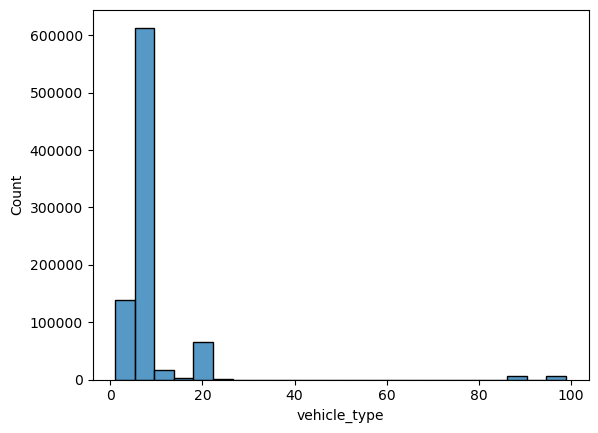

In [91]:
sns.histplot(data = vehicle_df['vehicle_type'], bins = 23)

### Junction_location Data Cleaning

In [92]:
vehicle_df['junction_location'].unique()

array([ 0,  1,  2,  4,  3,  8,  6,  7,  5,  9, -1], dtype=int64)

The stats20 pdf file showing the valid data points are 0 to 8 therefore I want to replace -1 and 9 with the mode of the dataset.

In [93]:
mode_junc = vehicle_df[vehicle_df['junction_location'] >= 0]['junction_location'].mode()[0]

vehicle_df['junction_location'] = vehicle_df['junction_location'].apply(lambda x: mode_junc if x < 0 or x == 9 else x)

<Axes: xlabel='junction_location', ylabel='Count'>

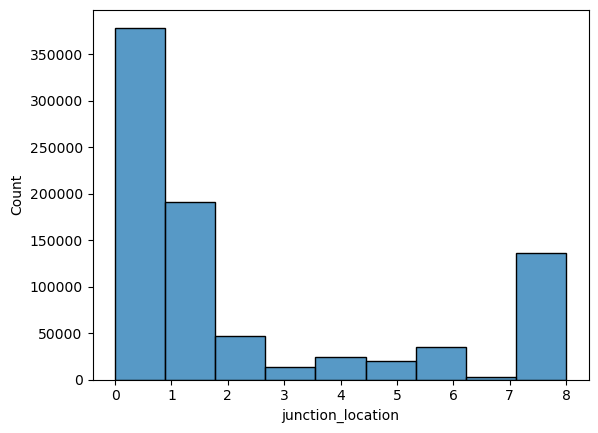

In [94]:
sns.histplot(vehicle_df['junction_location'], bins = 9)

## LSOA table to Panda Dataframe

In [95]:
# Create a Pandas DataFrame from the "lsoa" table
query = "SELECT * FROM lsoa"
lsoa_df = pd.read_sql_query(query, conn)

In [96]:
lsoa_df.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [97]:
lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [98]:
lsoa_df.isna().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [99]:
lsoa_df.shape

(34378, 7)

In [100]:
lsoa_df.describe()

,objectid,shape__area,shape__length
count,34378.000000,3.437800e+04,34378.000000
mean,17189.500000,4.484756e+06,8672.586392
std,9924.218114,1.497949e+07,11186.682402
min,1.000000,1.836184e+04,794.752314
25%,8595.250000,2.804555e+05,3329.866718
50%,17189.500000,4.843540e+05,4605.231856
75%,25783.750000,1.509910e+06,7947.973477
max,34378.000000,6.837464e+08,176560.397355


# Q1. Accident Time Analysis of 2020

In [101]:
accident_df_2020.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [102]:
accident_df_2020['date'] = pd.to_datetime(accident_df_2020['date'], format='%d/%m/%Y')
accident_df_2020['time'] = pd.to_datetime(accident_df_2020['time'], format='%H:%M').dt.time

accident_df_2020['datetime'] = pd.to_datetime(accident_df_2020['date'].astype(str) + ' ' + accident_df_2020['time'].astype(str))

accident_df_2020['hour'] = accident_df_2020['datetime'].dt.hour
accident_df_2020['day_of_week'] = accident_df_2020['datetime'].dt.dayofweek

In [103]:
hourly_accident_counts = accident_df_2020.groupby('hour').size()
print("Accidents by Hour of the Day:", hourly_accident_counts)

Accidents by Hour of the Day: hour
0     1188
1      915
2      658
3      566
4      508
5      855
6     1830
7     3736
8     5267
9     3917
10    4173
11    4812
12    5395
13    5741
14    6245
15    7361
16    7381
17    7813
18    6618
19    5048
20    3715
21    3106
22    2555
23    1796
dtype: int64


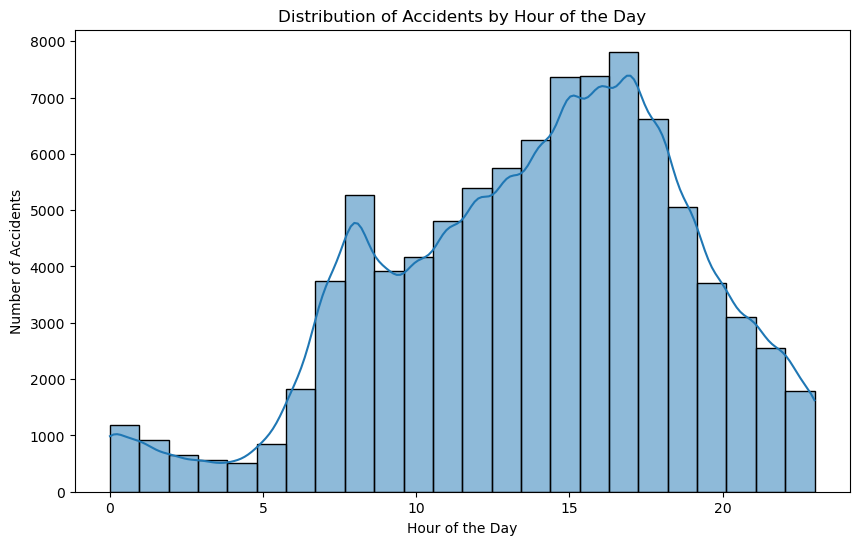

In [104]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=accident_df_2020, x='hour', bins=24, kde=True)
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


In [105]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_accident_counts = accident_df_2020.groupby('day_of_week').size()
daily_accident_counts.index = day_order
print("Accidents by Day of the Week:")
print(daily_accident_counts)

Accidents by Day of the Week:
Monday       12772
Tuesday      13267
Wednesday    13564
Thursday     14056
Friday       14889
Saturday     12336
Sunday       10315
dtype: int64


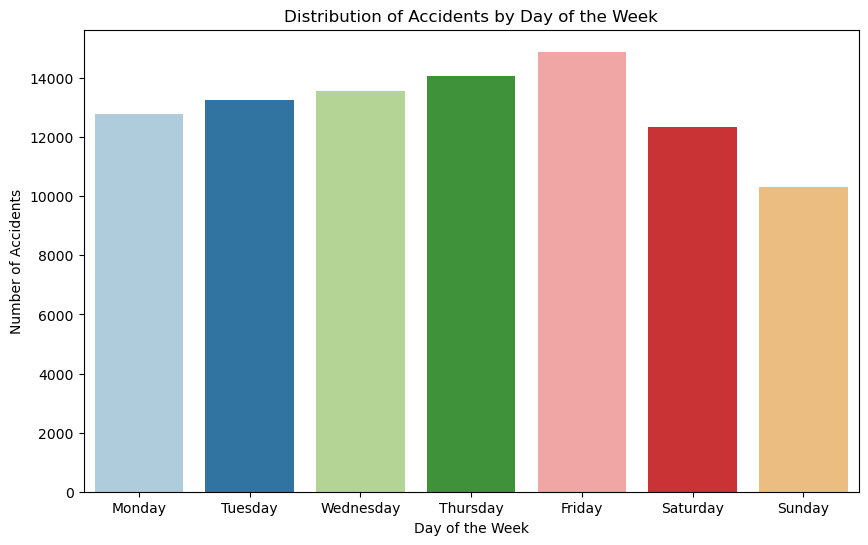

In [106]:
# Plot the distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_df_2020, x='day_of_week', order=range(7),palette='Paired')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), day_order)
plt.show()


## Q2. Motorbike Accident Analysis

In [107]:
# Join the accident and vehicle data on the appropriate key
bike_accident_df = accident_df_2020.merge(vehicle_df, on='accident_index')

In [108]:
bike_accident_df['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

The question was asked to find out the accident of Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc. To answer this I need to filter these three categories of data.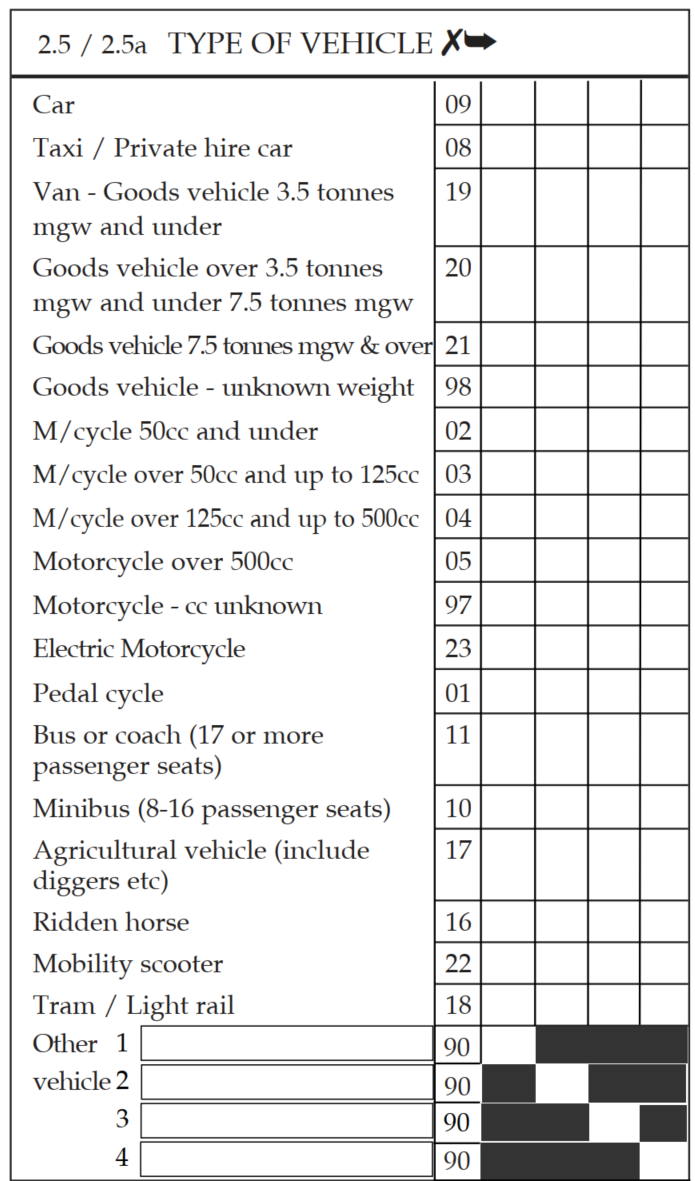

In [109]:
# Filter the data to include only the specified types of motorcycles
bikes = [3,4,5]
motorcycles_df = bike_accident_df[bike_accident_df['vehicle_type'].isin(bikes)]

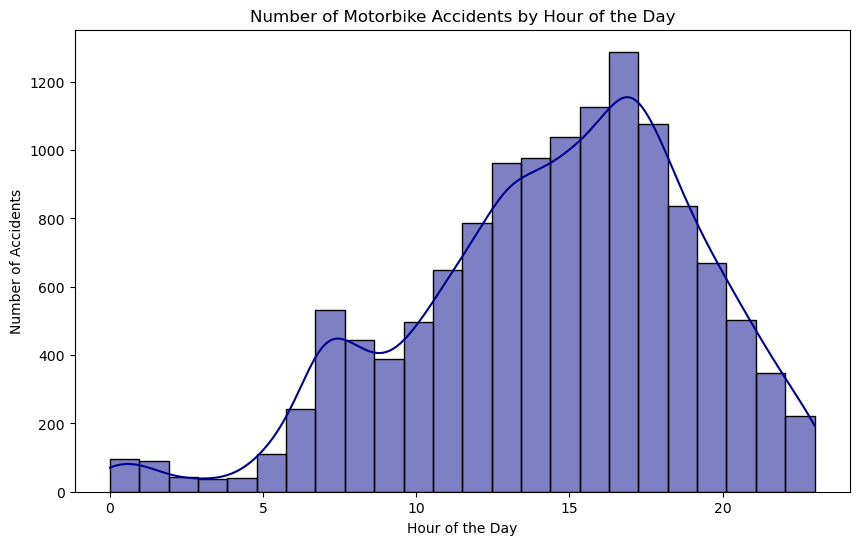

In [110]:
# Plot the number of motorbike accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(data=motorcycles_df, x='hour', bins=24, kde=True, color='darkblue')
plt.title('Number of Motorbike Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

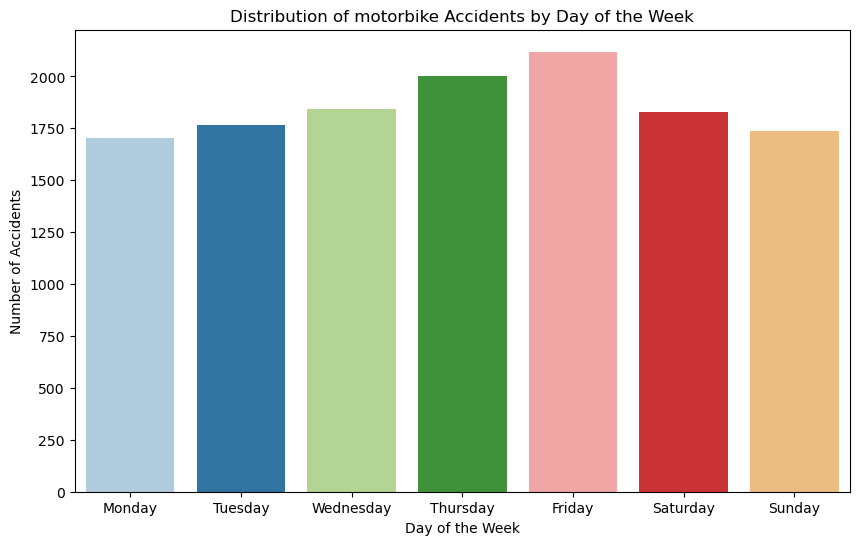

In [111]:
# Plot the distribution of motorbikes accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=motorcycles_df, x='day_of_week', order=range(7), palette='Paired' )
plt.title('Distribution of motorbike Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), day_order)
plt.show()

## Q3. Accident with Pedestrians  Involvement

In [112]:
# Join the accident and casualty data on the appropriate key
pedestrians_df = accident_df_2020.merge(casualty_df, on='accident_index')

In [113]:
# Filter the data to include only accidents where a pedestrian was involved
pedestrians_df['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

In the state20 document the code for pedestrians envolvement maked as 3. 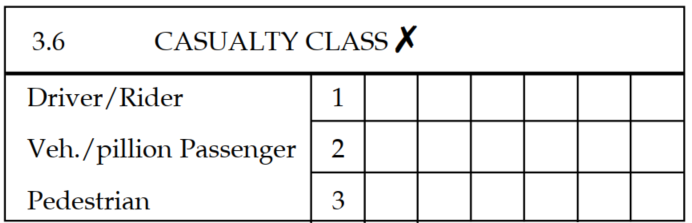

In [114]:
pedestrian_in_casualty = pedestrians_df[pedestrians_df['casualty_class'] == 3]

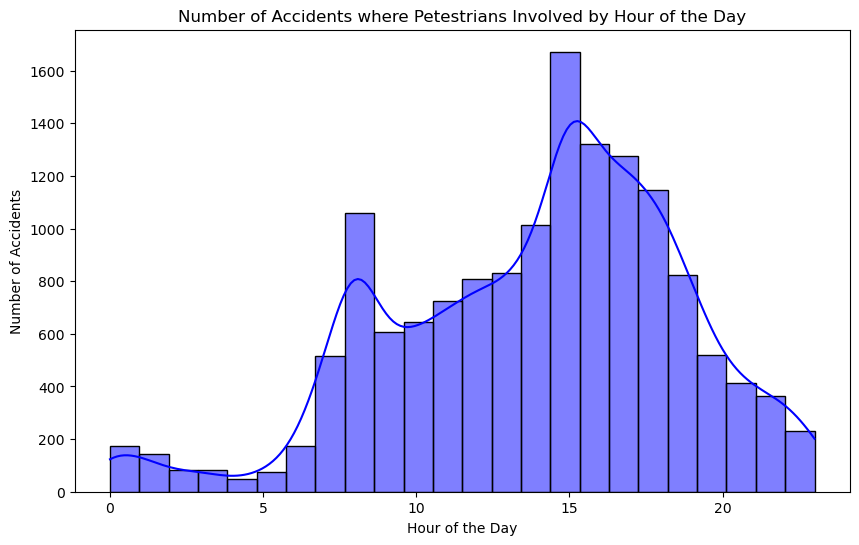

In [115]:
# Plot the number of accident cases where pedestrians were involved by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(data=pedestrian_in_casualty, x='hour', bins=24, kde=True, color='blue')
plt.title('Number of Accidents where Petestrians Involved by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

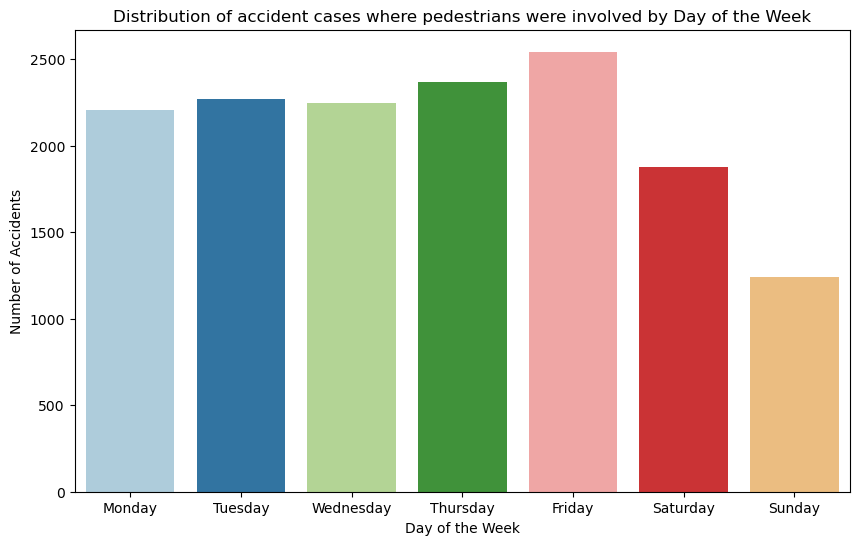

In [116]:
# Plot the distribution of accident cases where pedestrians were involved by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=pedestrian_in_casualty, x='day_of_week', order=range(7), palette='Paired' )
plt.title('Distribution of accident cases where pedestrians were involved by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), day_order)
plt.show()

## Q4. Impact of Selected Variable on Accident Severity 

For this task I want to marge accident_df_2020, vehicle_df, and casualty_df dataframes on accident index first, and then check few selected variables on accident severity

In [117]:
accident_df_2020.shape

(91199, 38)

In [118]:
# Merge accident_df_2020 with vehicle_df using accident_index
merged_df = pd.merge(accident_df_2020, vehicle_df, on='accident_index', how='inner')

# Merge merged_df with casualty_df using accident_index
a_df = pd.merge(merged_df, casualty_df, on='accident_index', how='inner')

In [119]:
a_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,2,0,0,0,0,0,5,2,9
220431,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,2,0,0,0,0,0,5,2,9
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11,3,0,0,0,0,0,1,1,9
220433,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11,3,0,0,0,0,0,1,1,9


In [120]:
a_df.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime', 'hour',
       'vehicle_index', 'accident_year_y', 'accident_reference_y',
      

<b>Note: </b>For this analysis I want to use variables like speed_limit, number_of_vehicles, light_conditions, weather_conditions, road_type, road_surface_conditions, special_conditions_at_site, junction_detail and junction_location on accident_severity


In [121]:
a_df['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

In [122]:
a_df['number_of_vehicles'].unique()

array([ 1,  2,  3,  4,  8,  6,  7,  5,  9, 10, 11, 13, 12], dtype=int64)

In [123]:
a_df['light_conditions'].unique()

array([1, 4, 5, 7, 6], dtype=int64)

In [124]:
a_df['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [125]:
a_df['road_type'].unique()

array([6, 2, 3, 7, 1, 9], dtype=int64)

In [126]:
a_df['road_surface_conditions'].unique()

array([1., 2., 5., 4., 3.])

In [127]:
a_df['special_conditions_at_site'].unique()

array([0, 2, 4, 5, 1, 3, 6, 7], dtype=int64)

In [128]:
a_df['junction_detail'].unique()

array([0, 9, 3, 6, 1, 7, 8, 2, 5], dtype=int64)

In [129]:
a_df['junction_location'].unique()

array([0, 2, 1, 6, 7, 8, 5, 3, 4], dtype=int64)

In [130]:
accident_severity =pd.get_dummies(a_df.accident_severity, prefix='accident_severity')
speed_limit =pd.get_dummies(a_df.speed_limit, prefix='speed')
number_of_vehicles =pd.get_dummies(a_df.number_of_vehicles, prefix = 'vehicle_count')
light_conditions =pd.get_dummies(a_df.light_conditions, prefix='light')
weather_conditions =pd.get_dummies(a_df.weather_conditions, prefix='weather')
road_type =pd.get_dummies(a_df.road_type, prefix='type')
road_surface_conditions =pd.get_dummies(a_df.road_surface_conditions, prefix='surface')
special_conditions_at_site =pd.get_dummies(a_df.special_conditions_at_site, prefix='special_condition')
junction_detail =pd.get_dummies(a_df.junction_detail, prefix='junction')
junction_location =pd.get_dummies(a_df.junction_location, prefix='location_of_vehicle')

In [131]:
aa_df = pd.concat([accident_severity,speed_limit,number_of_vehicles,light_conditions,weather_conditions,road_type,road_surface_conditions,special_conditions_at_site,junction_detail,junction_location], axis =1)

In [132]:
aa_df

,accident_severity_1,accident_severity_2,accident_severity_3,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70,vehicle_count_1,...,junction_9,location_of_vehicle_0,location_of_vehicle_1,location_of_vehicle_2,location_of_vehicle_3,location_of_vehicle_4,location_of_vehicle_5,location_of_vehicle_6,location_of_vehicle_7,location_of_vehicle_8
0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
220431,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
220432,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
220433,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
freq_item_set = apriori(aa_df, min_support=0.2, use_colnames=True)

In [134]:
freq_item_set

,support,itemsets
0,0.203362,(accident_severity_2)
1,0.777445,(accident_severity_3)
2,0.542663,(speed_30)
3,0.660803,(vehicle_count_2)
4,0.710604,(light_1)
...,...,...
356,0.247075,"(accident_severity_3, weather_1, surface_1.0, ..."
357,0.282904,"(accident_severity_3, weather_1, surface_1.0, ..."
358,0.227133,"(speed_30, weather_1, surface_1.0, special_con..."
359,0.252555,"(weather_1, surface_1.0, special_condition_0, ..."


In [135]:
rules = association_rules(freq_item_set, metric='lift', min_threshold=0.5)

In [136]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_30),(accident_severity_3),0.542663,0.777445,0.439218,0.809375,1.041070,0.017327,1.167501,0.086261
1,(accident_severity_3),(speed_30),0.777445,0.542663,0.439218,0.564951,1.041070,0.017327,1.051230,0.177260
2,(vehicle_count_2),(accident_severity_3),0.660803,0.777445,0.532910,0.806459,1.037320,0.019173,1.149912,0.106066
3,(accident_severity_3),(vehicle_count_2),0.777445,0.660803,0.532910,0.685464,1.037320,0.019173,1.078404,0.161655
4,(light_1),(accident_severity_3),0.710604,0.777445,0.558282,0.785645,1.010548,0.005827,1.038256,0.036067
...,...,...,...,...,...,...,...,...,...,...
4995,(junction_0),"(location_of_vehicle_0, weather_1, surface_1.0...",0.421825,0.223690,0.200744,0.475894,2.127475,0.106386,1.481209,0.916607
4996,(weather_1),"(location_of_vehicle_0, junction_0, surface_1....",0.780888,0.212679,0.200744,0.257071,1.208727,0.034665,1.059753,0.788105
4997,(surface_1.0),"(location_of_vehicle_0, junction_0, weather_1,...",0.695756,0.233629,0.200744,0.288526,1.234977,0.038195,1.077160,0.625381
4998,(special_condition_0),"(location_of_vehicle_0, junction_0, weather_1,...",0.975126,0.205848,0.200744,0.205865,1.000083,0.000017,1.000021,0.003327


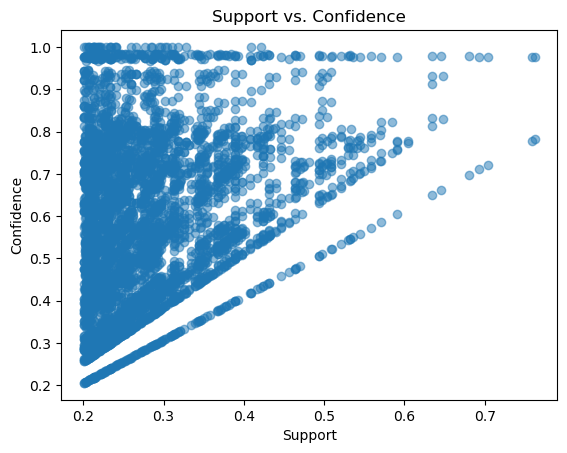

In [137]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()


In [138]:
# Filter rules where accident_severity is in the consequent
rules_accident_severity = rules[rules['consequents'].astype(str).str.contains('accident_severity')]

rules_accident_severity

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_30),(accident_severity_3),0.542663,0.777445,0.439218,0.809375,1.041070,0.017327,1.167501,0.086261
2,(vehicle_count_2),(accident_severity_3),0.660803,0.777445,0.532910,0.806459,1.037320,0.019173,1.149912,0.106066
4,(light_1),(accident_severity_3),0.710604,0.777445,0.558282,0.785645,1.010548,0.005827,1.038256,0.036067
7,(weather_1),(accident_severity_3),0.780888,0.777445,0.604246,0.773794,0.995304,-0.002851,0.983861,-0.021079
9,(type_6),(accident_severity_3),0.720652,0.777445,0.549137,0.762000,0.980134,-0.011130,0.935106,-0.067649
...,...,...,...,...,...,...,...,...,...,...
4809,(weather_1),"(accident_severity_3, surface_1.0, special_con...",0.780888,0.299757,0.282904,0.362285,1.208596,0.048827,1.098050,0.787695
4810,(surface_1.0),"(accident_severity_3, weather_1, special_condi...",0.695756,0.325048,0.282904,0.406614,1.250935,0.056750,1.137458,0.659332
4811,(special_condition_0),"(accident_severity_3, weather_1, surface_1.0, ...",0.975126,0.288616,0.282904,0.290121,1.005214,0.001467,1.002120,0.208540
4812,(light_1),"(accident_severity_3, weather_1, surface_1.0, ...",0.710604,0.353973,0.282904,0.398118,1.124713,0.031370,1.073345,0.383159


### Accident in Kingston upon Hull, Humberside, and the East Riding of Yorkshire

<b> Note: </b> The States20 file showing that the police force code number for Humberside is 16, therefore for this analysis police_force 16 shall be filtered out.

In [139]:
hull_df = a_df[a_df['police_force'] == 16]

In [140]:
hull_df.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
87680,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,...,5,2,0,0,0,0,0,9,1,1
87681,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,3,0,0,0,0,0,9,3,6
87682,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,3,0,0,0,0,0,9,3,6
87683,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,6,3,0,0,0,0,0,9,1,3
87684,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,9,2,5,1,0,0,0,0,1,6


In [141]:
features = hull_df[['longitude','latitude']]

In [142]:
# Create a dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

In [143]:
# Clustering Algorithms to Compare
algorithms = {
    'K-Means': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.1, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=5)
}

In [144]:
# Loop through each algorithm and calculate silhouette score
for name, algorithm in algorithms.items():
    cluster_labels = algorithm.fit_predict(features)
    silhouette_scores[name] = silhouette_score(features, cluster_labels)

In [145]:
# Print silhouette scores
for name, score in silhouette_scores.items():
    print(f"{name}: Silhouette Score = {score:.3f}")

K-Means: Silhouette Score = 0.614
DBSCAN: Silhouette Score = 0.343
Agglomerative: Silhouette Score = 0.589


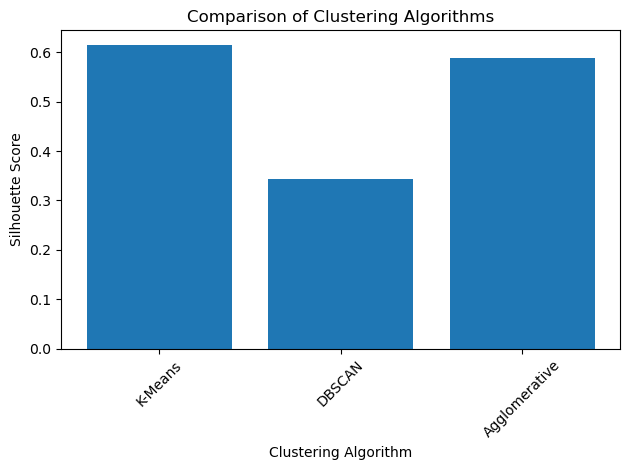

In [146]:
# Visualize silhouette scores
plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
# Choose the best algorithm based on silhouette score
best_algorithm = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best Algorithm: {best_algorithm}")

Best Algorithm: K-Means


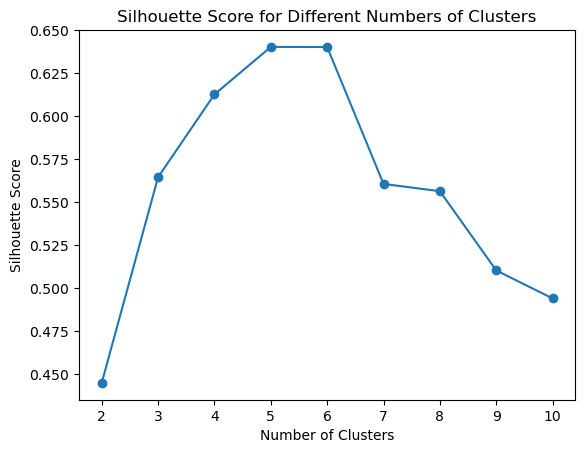

In [148]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use Silhouette Score to determine the number of clusters
silhouette_scores = []
possible_clusters = range(2, 11)  

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score
plt.plot(possible_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(possible_clusters)
plt.show()

In [149]:
X = features
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [150]:
cluster_labels = kmeans.fit_predict(X)

In [151]:
# Add the cluster labels back to the DataFrame
hull_df['cluster'] = cluster_labels

<Axes: xlabel='longitude', ylabel='latitude'>

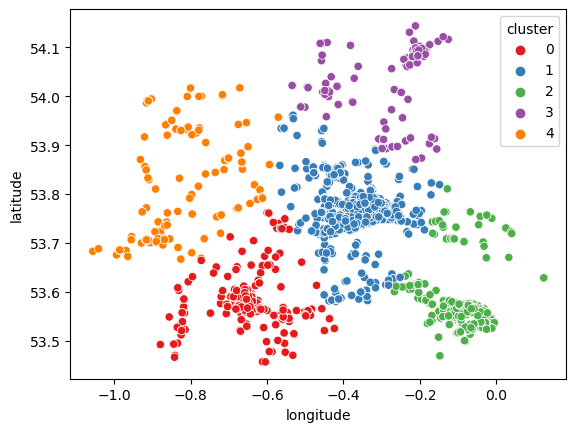

In [152]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=hull_df, palette='Set1')

In [153]:
kmeans.inertia_

37.824790016718254

## Outlier Detection

In [154]:
description = a_df.describe()

columns_with_negative_min = description.columns[description.loc['min'] < 0]

print(columns_with_negative_min)

Index(['longitude', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'trunk_road_flag', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact',
       'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver',
       'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc',
       'propulsion_code', 'age_of_vehicle', 'driver_imd_decile',
       'driver_home_area_type', 'age_band_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_home_area_type',
       'casualty_imd_decile'],
      dtype='object')


In the earlier section of the analysis, I have cleaned many columns at outliers were detected, in most case I used mode of the valid data point. In one case I have used KNN based ML algorithm to remove outlier (-1) in the LSOA_of_accident_location. Here, to answer question no 6, I want to show the scientific way of outlier detection. 

Still there are many columns this dataset has invalid categorial datapoints. To answer this question no 6 I want to use age_of_driver and age_of_vehicle columns.

In [155]:
a_df['age_of_driver'].unique()

array([ 32,  45,  -1,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  59,  67,  34,  23,  54,  53,  27,  39,  56,
        43,  88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,
        58,  70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,
        78,  72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,
        10,  91,  84,  13,   8,  89,  93,  94,  92,   6,  12,   5,   4,
         7,  97,  95,   3,  98, 100,  99,  96], dtype=int64)

<Axes: xlabel='age_of_driver', ylabel='Count'>

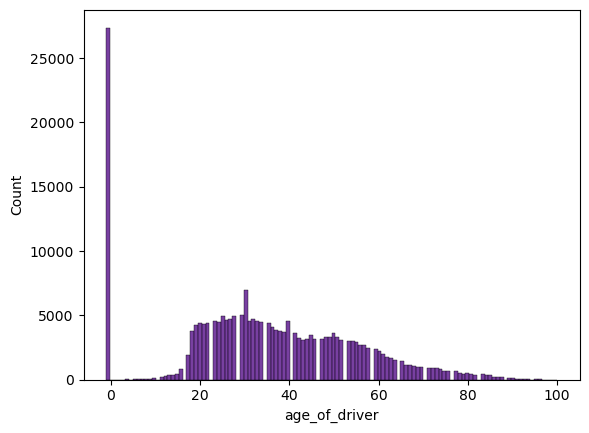

In [156]:
sns.histplot(data = a_df['age_of_driver'], color = 'indigo')

In [157]:
a_df['age_of_vehicle'].value_counts()

-1     50460
 4     12611
 1     12549
 5     11835
 3     11661
       ...  
 47        1
 96        1
 68        1
 64        1
 93        1
Name: age_of_vehicle, Length: 75, dtype: int64

<Axes: xlabel='age_of_vehicle', ylabel='Count'>

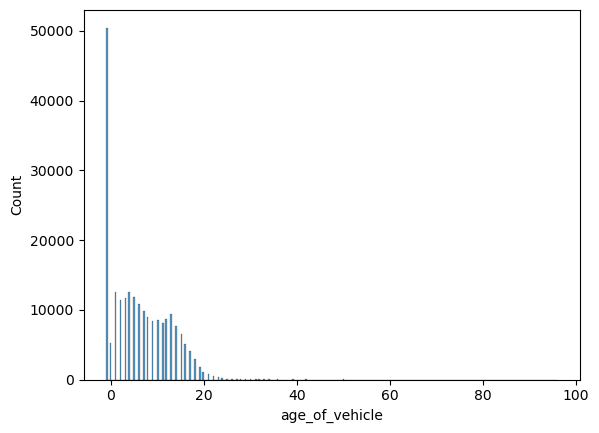

In [158]:
sns.histplot(data = a_df['age_of_vehicle'])

So in both case we have significant amount of outliers.

In [159]:
driver_age = a_df['age_of_driver'].replace(-1, np.nan).dropna().values
vehicle_age = a_df['age_of_vehicle'].replace(-1, np.nan).dropna().values

In [160]:
driver_age.max(), driver_age.min()

(100.0, 3.0)

In [161]:
# for this analysis we need to count first and third quartiles (Q1 and Q3)
q1 = np.percentile(driver_age, 25)
q3 = np.percentile(driver_age, 75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Set a scaling factor for outlier detection
k = 1.8

# Calculate the lower and upper bounds for outlier detection
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

# Identify the outliers
outliers = [x for x in driver_age if x < lower_bound or x > upper_bound]

print("Outliers:", outliers)

Outliers: [97.0, 95.0, 97.0, 98.0, 98.0, 95.0, 98.0, 95.0, 100.0, 99.0, 99.0, 99.0, 96.0, 97.0, 97.0, 96.0, 96.0, 95.0, 95.0, 96.0, 96.0, 95.0, 95.0, 96.0, 96.0, 95.0, 95.0, 95.0, 98.0, 96.0, 96.0, 95.0, 96.0, 96.0]


In [162]:
# Calculate the Z-scores
z_scores = np.abs(stats.zscore(driver_age))

# Set a threshold for outlier detection (you can adjust this value as needed)
threshold = 3

# Identify the outliers
outliers = np.where(z_scores > threshold)[0]

print("Outliers:", [driver_age[i] for i in outliers])

Outliers: [90.0, 91.0, 90.0, 90.0, 91.0, 91.0, 93.0, 91.0, 90.0, 94.0, 92.0, 90.0, 90.0, 90.0, 93.0, 93.0, 90.0, 90.0, 91.0, 93.0, 91.0, 91.0, 97.0, 91.0, 91.0, 93.0, 93.0, 93.0, 93.0, 94.0, 91.0, 91.0, 95.0, 91.0, 91.0, 91.0, 91.0, 91.0, 93.0, 93.0, 92.0, 91.0, 91.0, 97.0, 90.0, 94.0, 90.0, 90.0, 90.0, 92.0, 92.0, 90.0, 90.0, 90.0, 92.0, 92.0, 93.0, 91.0, 92.0, 92.0, 92.0, 90.0, 93.0, 91.0, 92.0, 92.0, 92.0, 94.0, 92.0, 91.0, 90.0, 92.0, 90.0, 90.0, 90.0, 93.0, 90.0, 90.0, 90.0, 90.0, 91.0, 98.0, 98.0, 91.0, 92.0, 92.0, 92.0, 94.0, 90.0, 90.0, 95.0, 90.0, 90.0, 90.0, 92.0, 98.0, 95.0, 93.0, 100.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 92.0, 90.0, 93.0, 93.0, 90.0, 90.0, 90.0, 90.0, 91.0, 94.0, 99.0, 99.0, 91.0, 90.0, 91.0, 92.0, 92.0, 94.0, 93.0, 90.0, 91.0, 92.0, 92.0, 92.0, 91.0, 99.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 92.0, 96.0, 92.0, 92.0, 92.0, 92.0, 97.0, 97.0, 90.0, 90.0, 90.0, 96.0, 92.0, 90.0, 92.0, 92.0, 92.0, 91.0, 91.0, 90.0, 93.0, 90.0, 90.0, 90.0, 92.0, 90.0, 90.0

In [163]:
vehicle_age.max(), vehicle_age.min()

(96.0, 0.0)

In [164]:
# for this analysis we need to count first and third quartiles (Q1 and Q3)
q1 = np.percentile(vehicle_age, 25)
q3 = np.percentile(vehicle_age, 75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Set a scaling factor for outlier detection
k = 5

# Calculate the lower and upper bounds for outlier detection
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

# Identify the outliers
outliers = [x for x in vehicle_age if x < lower_bound or x > upper_bound]

print("Outliers:", outliers)

Outliers: [57.0, 57.0, 54.0, 57.0, 62.0, 58.0, 60.0, 60.0, 64.0, 86.0, 61.0, 61.0, 53.0, 53.0, 55.0, 92.0, 57.0, 88.0, 57.0, 57.0, 58.0, 60.0, 67.0, 61.0, 84.0, 67.0, 60.0, 66.0, 56.0, 54.0, 53.0, 60.0, 58.0, 78.0, 53.0, 53.0, 53.0, 57.0, 56.0, 61.0, 54.0, 56.0, 86.0, 53.0, 53.0, 67.0, 54.0, 96.0, 56.0, 68.0, 61.0, 88.0, 55.0, 60.0, 57.0, 61.0, 63.0, 93.0, 63.0, 63.0, 56.0]


In [165]:
# Calculate the Z-scores
z_scores = np.abs(stats.zscore(vehicle_age))

# Set a threshold for outlier detection
threshold = 8

# Identify the outliers
outliers = np.where(z_scores > threshold)[0]

print("Outliers:", [vehicle_age[i] for i in outliers])

Outliers: [57.0, 57.0, 54.0, 57.0, 62.0, 58.0, 60.0, 60.0, 64.0, 86.0, 61.0, 61.0, 55.0, 92.0, 57.0, 88.0, 57.0, 57.0, 58.0, 60.0, 67.0, 61.0, 84.0, 67.0, 60.0, 66.0, 56.0, 54.0, 60.0, 58.0, 78.0, 57.0, 56.0, 61.0, 54.0, 56.0, 86.0, 67.0, 54.0, 96.0, 56.0, 68.0, 61.0, 88.0, 55.0, 60.0, 57.0, 61.0, 63.0, 93.0, 63.0, 63.0, 56.0]


In [166]:
def grubbs_test_statistic(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    absolute_deviations = np.abs(data - mean)
    max_deviation_index = np.argmax(absolute_deviations)
    G = absolute_deviations[max_deviation_index] / std_dev
    return G, max_deviation_index

In [167]:
# critical G value
def critical_value(alpha, n):
    t_value = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    critical_G = (n - 1) * np.sqrt(t_value ** 2 / (n * (n - 2 + t_value ** 2)))
    return critical_G

In [168]:
# Function to apply Grubbs' test to a given column and print the outlier if detected
def apply_grubbs_test(column_name):
    G, index = grubbs_test_statistic(a_df[column_name])
    critical_G = critical_value(0.05, len(a_df[column_name]))
    
    print(f"{column_name} - G: {G}, Critical G: {critical_G}")
    
    if G > critical_G:
        outlier_row = a_df.loc[[index]]
        print(f"Outlier detected in {column_name} at index {index}:")
        print(outlier_row)
    else:
        print(f"No outlier detected in {column_name}.")

# Apply Grubbs' test to the 'age_of_driver' column
apply_grubbs_test('age_of_driver')

# Apply Grubbs' test to the 'age_of_vehicle' column
apply_grubbs_test('age_of_vehicle')


age_of_driver - G: 3.174198055899221, Critical G: 5.175740951909146
No outlier detected in age_of_driver.
age_of_vehicle - G: 14.33217170504271, Critical G: 5.175740951909146
Outlier detected in age_of_vehicle at index 188472:
       accident_index  accident_year_x accident_reference_x  \
188472  2020500954946             2020            500954946   

        location_easting_osgr  location_northing_osgr  longitude  latitude  \
188472               243392.0                 55369.0   -4.20392   50.3773   

        police_force  accident_severity  number_of_vehicles  ...  \
188472            50                  2                   1  ...   

        age_band_of_casualty casualty_severity  pedestrian_location  \
188472                     4                 2                    5   

       pedestrian_movement  car_passenger bus_or_coach_passenger  \
188472                   1              0                      0   

       pedestrian_road_maintenance_worker  casualty_type  \
188472      

### Local Outlier Factor

In [171]:
q6_df = accident_df_2020[['longitude', 'latitude', 'accident_severity', 'urban_or_rural_area']]

In [172]:
# Create the LocalOutlierFactor model
lof_model = LocalOutlierFactor(contamination=0.0025)
X = q6_df[['longitude', 'latitude']]
outliers = lof_model.fit_predict(X)
q6_df['outlier'] = outliers

In [173]:
# Separate Outliers and Inliers
outlier_data = q6_df[q6_df['outlier'] == -1]
inlier_data = q6_df[q6_df['outlier'] == 1]

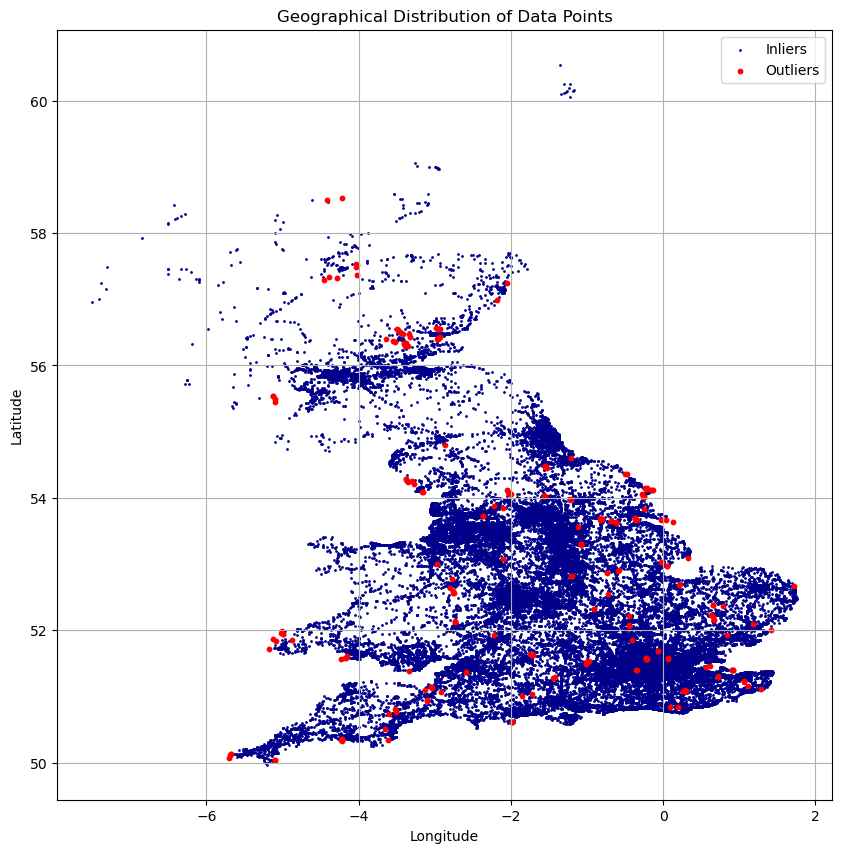

In [174]:
# Plotting
plt.figure(figsize=(10,10))
plt.scatter(inlier_data['longitude'], inlier_data['latitude'], color='darkblue', s=1, label='Inliers')
plt.scatter(outlier_data['longitude'], outlier_data['latitude'], color='red', s=10, label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Data Points')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
# Analyzing Urban or Rural Area Flag
outlier_urban_rural_distribution = outlier_data['urban_or_rural_area'].value_counts(normalize=True)
inlier_urban_rural_distribution = inlier_data['urban_or_rural_area'].value_counts(normalize=True)
print("Outlier Urban/Rural Distribution:", outlier_urban_rural_distribution)
print("Inlier Urban/Rural Distribution:", inlier_urban_rural_distribution)

Outlier Urban/Rural Distribution: 2    0.951754
1    0.048246
Name: urban_or_rural_area, dtype: float64
Inlier Urban/Rural Distribution: 1    0.678524
2    0.321322
3    0.000154
Name: urban_or_rural_area, dtype: float64


In [176]:
# Analyzing Accident Severity
outlier_avg_severity = outlier_data['accident_severity'].mean()
inlier_avg_severity = inlier_data['accident_severity'].mean()
print("Outlier Average Severity:", outlier_avg_severity)
print("Inlier Average Severity:", inlier_avg_severity)

Outlier Average Severity: 2.6447368421052633
Inlier Average Severity: 2.768541623154632


## Isolation Forests

In [177]:
p_df = accident_df_2020.select_dtypes(include=['float64', 'int64'])

In [178]:
p_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hour
370153,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,1,...,0,1,9,1.0,0,0,1,1,2,9
370154,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,0,...,4,1,1,1.0,0,0,1,1,2,13
370155,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2,...,0,4,1,2.0,0,0,1,1,2,1
370156,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,2,...,4,4,1,1.0,0,0,1,1,2,1
370157,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,2,...,0,4,1,1.0,0,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,2,...,0,1,1,1.0,0,0,1,1,-1,14
461348,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,4,...,0,1,1,1.0,0,0,1,2,-1,15
461349,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,2,...,0,1,1,1.0,0,0,2,1,-1,12
461350,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,1,...,0,1,1,1.0,0,0,1,2,-1,14


In [179]:
X = p_df[['longitude', 'latitude']]

In [180]:
X

,longitude,latitude
370153,-0.254001,51.462262
370154,-0.139253,51.470327
370155,-0.178719,51.529614
370156,-0.001683,51.541210
370157,-0.137592,51.515704
...,...,...
461347,-2.926320,56.473539
461348,-4.267565,55.802353
461349,-2.271903,57.186317
461350,-3.968753,55.950940


In [181]:
ranst = np.random.RandomState(0)

# Contamination values
contamination_values = [0.01, 0.05, 0.1, 0.2]

outliers_counts = {}

Contamination value: 0.01, Number of outliers: 907


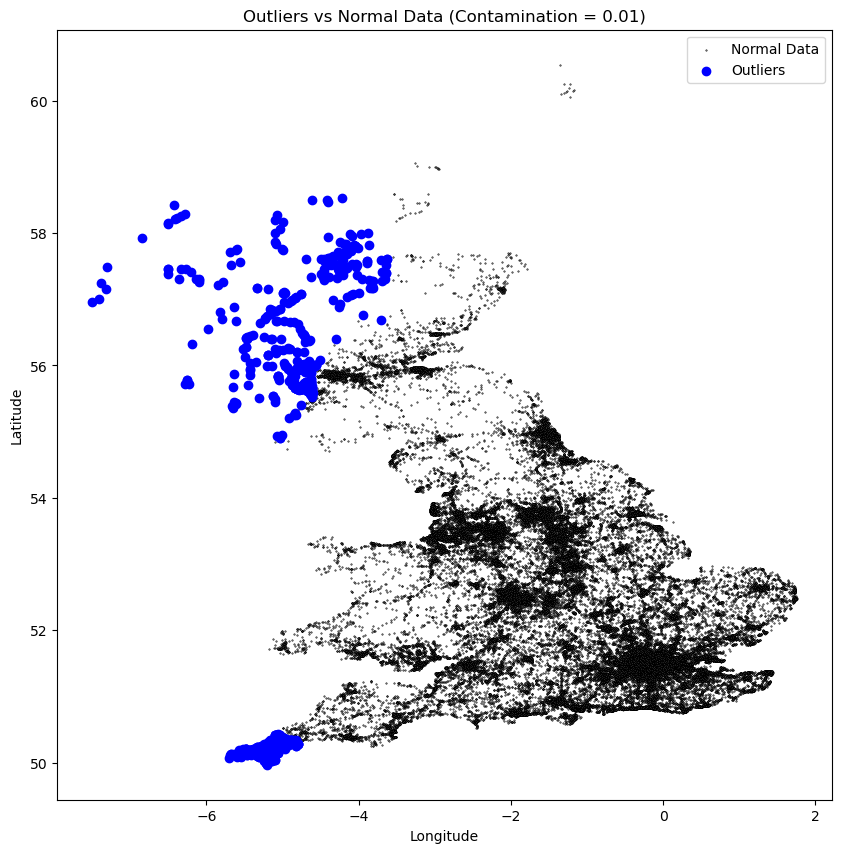

Contamination value: 0.05, Number of outliers: 4539


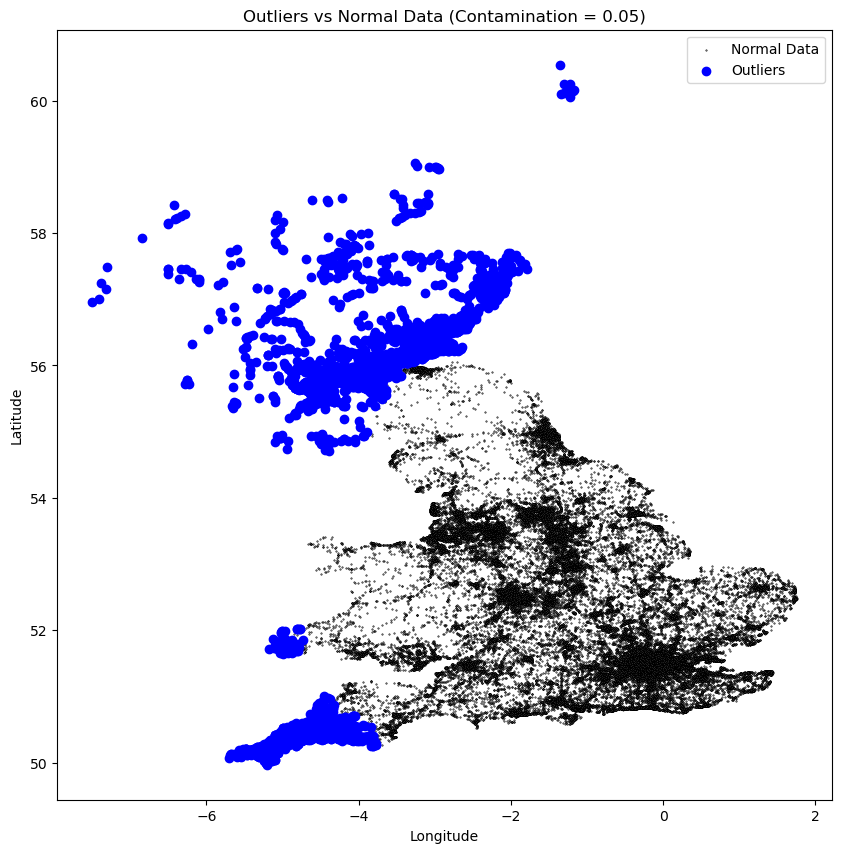

Contamination value: 0.1, Number of outliers: 9118


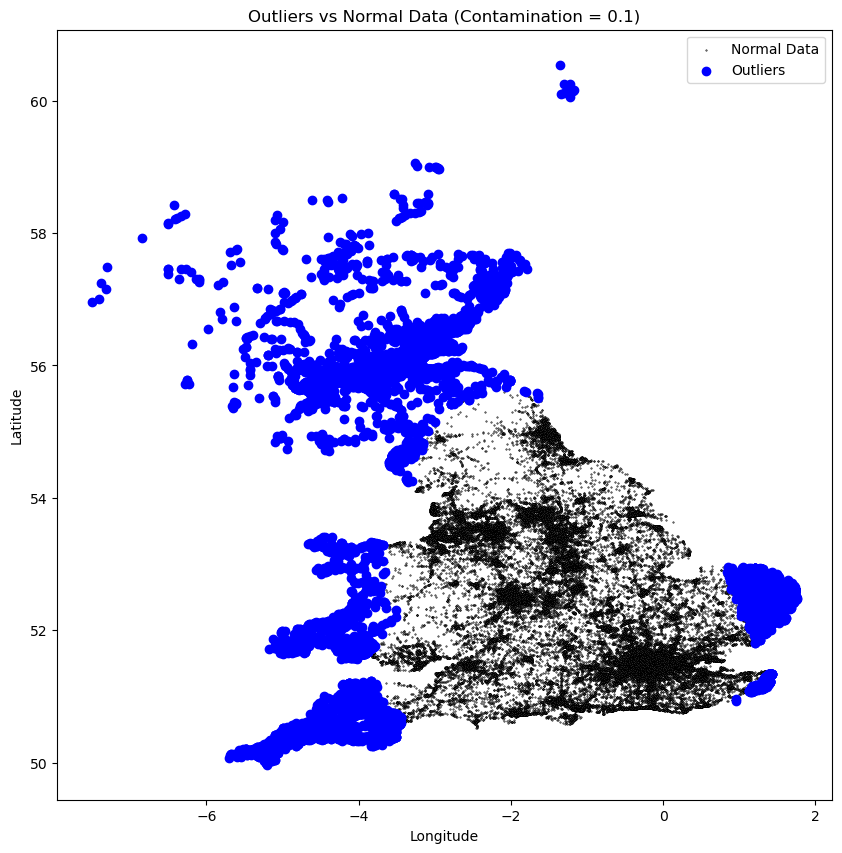

Contamination value: 0.2, Number of outliers: 18236


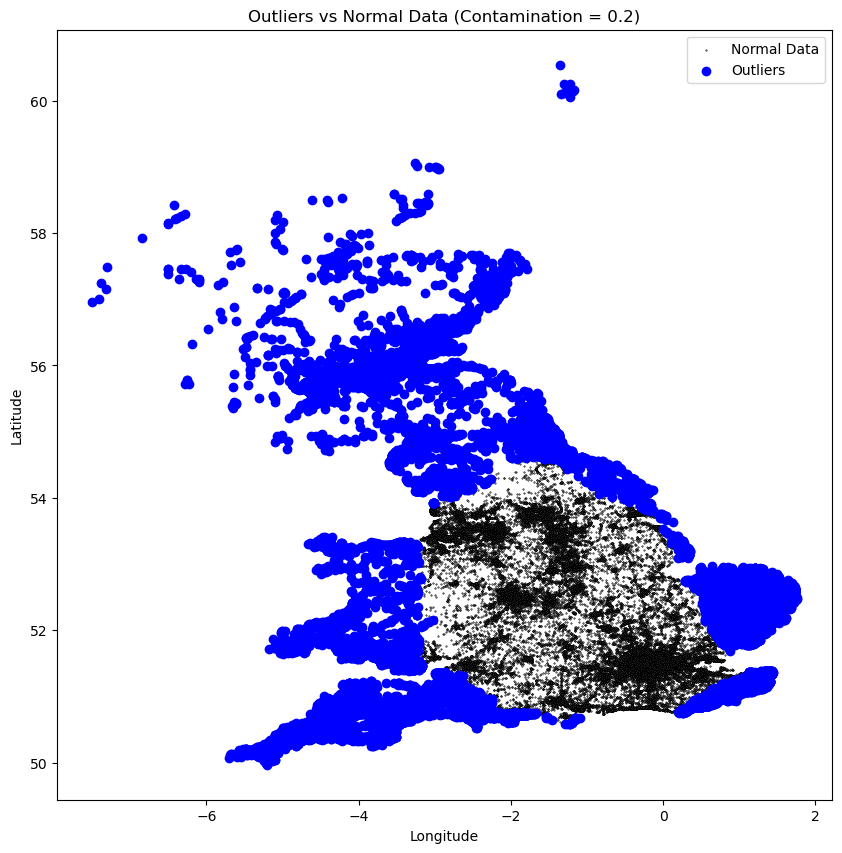

{0.01: 907, 0.05: 4539, 0.1: 9118, 0.2: 18236}


In [182]:
for cont in contamination_values:
    model = IsolationForest(max_samples=100, random_state=ranst, contamination=cont)
    model.fit(X)
    if_anomalies = X[model.predict(X) == -1]
    
    # Count the number of outliers
    num_outliers = len(if_anomalies)
    outliers_counts[cont] = num_outliers
    
    # To print the combination and number of outliers
    print(f"Contamination value: {cont}, Number of outliers: {num_outliers}")

    
    # Plot the data
    plt.figure(figsize=(10, 10))
    plt.scatter(X['longitude'], X['latitude'], c='white', s=0.2, edgecolors='k', label='Normal Data')
    plt.scatter(if_anomalies['longitude'], if_anomalies['latitude'], c='blue', label='Outliers')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.title(f'Outliers vs Normal Data (Contamination = {cont})')
    plt.show()

print(outliers_counts)

# Classifications

In [183]:
a_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,2,0,0,0,0,0,5,2,9
220431,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,2,0,0,0,0,0,5,2,9
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11,3,0,0,0,0,0,1,1,9
220433,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11,3,0,0,0,0,0,1,1,9


In [184]:
a_df.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime', 'hour',
       'vehicle_index', 'accident_year_y', 'accident_reference_y',
      

In [185]:
selected_columns = ['accident_severity', 'speed_limit', 'junction_detail', 'pedestrian_crossing_physical_facilities',
                    'light_conditions', 'weather_conditions', 'road_surface_conditions',
                    'special_conditions_at_site', 'road_type', 'carriageway_hazards',
                    'age_of_driver', 'age_of_vehicle']

c_df = a_df[selected_columns]

In [186]:
description = c_df.describe()

# Find columns with negative minimum values
columns_with_negative_min = description.columns[description.loc['min'] < 0]

print(columns_with_negative_min)

Index(['age_of_driver', 'age_of_vehicle'], dtype='object')


In [187]:
c_df['age_of_driver'].value_counts()

-1      27373
 30      6948
 29      4990
 28      4908
 25      4907
        ...  
 97         4
 98         4
 99         3
 3          2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [188]:
mode_driver_age = c_df[c_df['age_of_driver'] >= 0]['age_of_driver'].mode()[0]

c_df['age_of_driver'] = c_df['age_of_driver'].apply(lambda x: mode_driver_age if x<0 else x)

<Axes: xlabel='age_of_driver', ylabel='Count'>

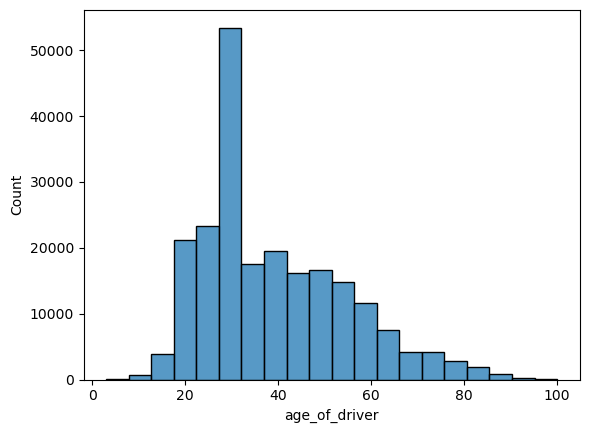

In [189]:
sns.histplot(data = c_df['age_of_driver'], bins = 20)

In [190]:
mode_vehicle_age = c_df[c_df['age_of_vehicle'] >= 0]['age_of_vehicle'].mode()[0]

c_df['age_of_vehicle'] = c_df['age_of_vehicle'].apply(lambda x: mode_vehicle_age if x<0 else x)

<Axes: xlabel='age_of_vehicle', ylabel='Count'>

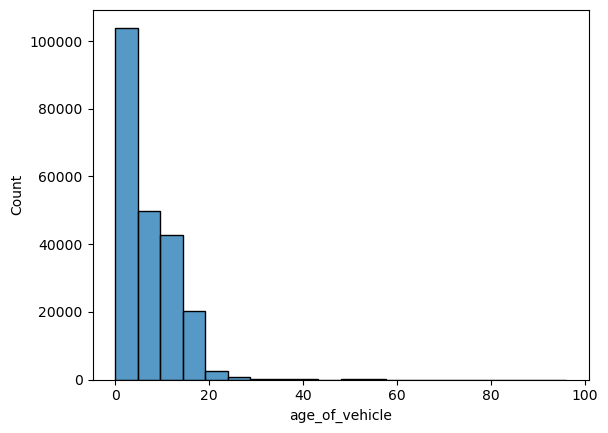

In [191]:
sns.histplot(data = c_df['age_of_vehicle'], bins = 20)

In [192]:
c_df

,accident_severity,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_type,carriageway_hazards,age_of_driver,age_of_vehicle
0,3,20,0,0,1,9,1.0,0,6,0,32,6
1,3,20,9,4,1,1,1.0,0,6,0,45,2
2,3,20,9,4,1,1,1.0,0,6,0,45,2
3,3,30,3,0,4,1,2.0,0,6,0,30,4
4,2,30,0,4,4,1,1.0,0,6,0,44,8
...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2,60,8,0,1,1,1.0,0,6,0,57,2
220431,2,60,8,0,1,1,1.0,0,6,0,38,2
220432,3,30,3,0,1,1,1.0,0,6,0,68,1
220433,3,30,3,0,1,1,1.0,0,6,0,76,4


In [193]:
c_df.columns

Index(['accident_severity', 'speed_limit', 'junction_detail',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'road_type', 'carriageway_hazards',
       'age_of_driver', 'age_of_vehicle'],
      dtype='object')

In [ ]:
data = c_df

# Define the target variable and features
X = data[['speed_limit', 'junction_detail',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'road_type', 'carriageway_hazards',
       'age_of_driver', 'age_of_vehicle']]
y = (data['accident_severity'] == 1).astype(int)  # Binary classification (1 for fatal, 0 otherwise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Test Precision": precision_score(y_test, y_pred_test),
        "Test Recall": recall_score(y_test, y_pred_test),
        "Test F1 Score": f1_score(y_test, y_pred_test),
    }

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Evaluate the models
model_results = {name: evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test) for name, model in models.items()}

# Create a DataFrame for result
model_results_df = pd.DataFrame(model_results).T

print(model_results_df)


In [278]:
# hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [279]:
# Same hyperparameter grid as above
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate the randomized search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [280]:
# Create and fit the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=30, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

# Feature Importance
feature_importance = best_rf_model.feature_importances_
print("Feature Importance:", feature_importance)


Test Accuracy: 0.9949418195840044
Test Precision: 0.9560761346998536
Test Recall: 0.7718676122931442
Test F1 Score: 0.8541530412034009
Feature Importance: [0.04554587 0.02403753 0.01412398 0.01675147 0.02473275 0.0162449
 0.00403482 0.01532607 0.01091511 0.13129287 0.08877224 0.60822239]


In [281]:
feature_names = ['number_of_vehicles', 'speed_limit', 'junction_detail', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'road_type', 'age_of_driver', 'age_of_vehicle']
feature_importance_dict = dict(zip(feature_names, feature_importance))
feature_importance_sorted = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance}")


casualty_severity: 0.608222387997933
age_of_driver: 0.1312928659650526
age_of_vehicle: 0.08877224169856385
number_of_vehicles: 0.04554586714847252
weather_conditions: 0.024732750787849485
speed_limit: 0.024037527320058878
light_conditions: 0.01675147155724082
road_surface_conditions: 0.016244899819925454
junction_location: 0.015326071576434099
junction_detail: 0.014123983791289284
road_type: 0.010915111757141776
special_conditions_at_site: 0.004034820580038177


In [282]:
# Create the Random Forest model with best parameters
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=30, random_state=42)

# Create the RFE model
rfe = RFE(estimator=rf_model, n_features_to_select=5)  # Select top 5 features
rfe_fit = rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe_fit.support_]

# Print selected features
print("Selected Features:", selected_features)

# Train Random Forest on selected features
rf_model.fit(X_train_scaled[:, rfe_fit.support_], y_train)

# Evaluate on test set
y_pred_test = rf_model.predict(X_test_scaled[:, rfe_fit.support_])
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Selected Features:", accuracy)


Selected Features: Index(['number_of_vehicles', 'weather_conditions', 'age_of_driver',
       'age_of_vehicle', 'casualty_severity'],
      dtype='object')
Test Accuracy with Selected Features: 0.992492117857872


In [283]:
# Using selected features
selected_features = ['number_of_vehicles', 'weather_conditions', 'age_of_driver', 'age_of_vehicle', 'casualty_severity']
X_selected = X[selected_features]

# Scaling
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Random Forest with best parameters
best_rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=30, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_selected_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99183433 0.99138068 0.99108581 0.99004242 0.9900651 ]
Mean Cross-Validation Accuracy: 0.9908816657971737
